# Predicting Laptop Prices based on given specifications 
Inspo: We wanted to change laptops however found it difficult to find approximate prices for a laptop of our required specifications.

Problem statement: Students find it difficult to determine the price of a laptop with their wanted specifications given the large amount of information 

Aim: We hope to aid decision making for students by estimating the cost of laptops based on required specifications so they no longer need to manually check multiple sources or retailers. 

## Import Relevant Libraries and Data Set

In [1]:
#Import relevant libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import plot_tree
sb.set()

In [2]:
# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
#Importing our dataset
import pandas as pd

try:
    dataset = pd.read_csv('laptop.csv', encoding='ISO-8859-1') 
except UnicodeDecodeError as e:
    print("Trying 'windows-1252' encoding because:", e)
    dataset = pd.read_csv('laptop.csv', encoding='windows-1252')

dataset.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  Price_SGD  
0      1339.69  1955.9474  
1       898.94  1312.4524  
2       575.00   839.5000  
3      2537.45  3704.6770  
4      1803.60  2633.2560

## Cleaning Data Set

In [4]:
# Create a copy of the Dataset
laptop_dataset = dataset.copy()

# Rename "#" to "ID" of Pokemon
laptop_dataset.rename(columns = {'#': 'ID'}, inplace = True)

# Remove all spaces and dots from Variable Names
laptop_dataset.columns = dataset.columns.str.replace(".","")
laptop_dataset.columns = dataset.columns.str.replace(" ","_")

# Print the Variable Information to check
laptop_dataset.head(100)

laptop_ID Company                                     Product  \
0           1   Apple                                 MacBook Pro   
1           2   Apple                                 Macbook Air   
2           3      HP                                      250 G6   
3           4   Apple                                 MacBook Pro   
4           5   Apple                                 MacBook Pro   
..        ...     ...                                         ...   
95         97    Acer                                      Spin 5   
96         98    Dell                               Inspiron 3567   
97         99    Dell                               Inspiron 3567   
98        100    Asus  X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce   
99        102      HP                             Omen 15-ce007nv   

              TypeName  Inches                           ScreenResolution  \
0            Ultrabook    13.3         IPS Panel Retina Display 2560x1600   
1            Ultrabook    13.3                                   1440x900   
2             Notebook    15.6                          Full HD 1920x1080   
3            Ultrabook    15.4         IPS Panel Retina Display 2880x1800   
4            Ultrabook    13.3         IPS Panel Retina Display 2560x1600   
..                 ...     ...                                        ...   
95  2 in 1 Convertible    13.3  IPS Panel Full HD / Touchscreen 1920x1080   
96            Notebook    15.6                          Full HD 1920x1080   
97            Notebook    15.6                          Full HD 1920x1080   
98            Notebook    15.6                          Full HD 1920x1080   
99              Gaming    15.6                IPS Panel Full HD 1920x1080   

                            Cpu   Ram                Memory  \
0          Intel Core i5 2.3GHz   8GB             128GB SSD   
1          Intel Core i5 1.8GHz   8GB   128GB Flash Storage   
2    Intel Core i5 7200U 2.5GHz   8GB             256GB SSD   
3          Intel Core i7 2.7GHz  16GB             512GB SSD   
4          Intel Core i5 3.1GHz   8GB             256GB SSD   
..                          ...   ...                   ...   
95   Intel Core i5 8250U 1.6GHz   8GB             256GB SSD   
96   Intel Core i7 7500U 2.7GHz   8GB               1TB HDD   
97     Intel Core i3 6006U 2GHz   4GB             256GB SSD   
98   Intel Core i3 7100U 2.4GHz   6GB             256GB SSD   
99  Intel Core i7 7700HQ 2.8GHz  12GB  128GB SSD +  1TB HDD   

                             Gpu       OpSys  Weight  Price_euros  Price_SGD  
0   Intel Iris Plus Graphics 640       macOS  1.37kg      1339.69  1955.9474  
1         Intel HD Graphics 6000       macOS  1.34kg       898.94  1312.4524  
2          Intel HD Graphics 620       No OS  1.86kg       575.00   839.5000  
3             AMD Radeon Pro 455       macOS  1.83kg      2537.45  3704.6770  
4   Intel Iris Plus Graphics 650       macOS  1.37kg      1803.60  2633.2560  
..                           ...         ...     ...          ...        ...  
95        Intel UHD Graphics 620  Windows 10   1.5kg       847.00  1236.6200  
96            AMD Radeon R5 M430       Linux   2.2kg       599.90   875.8540  
97            AMD Radeon R5 M430       Linux   2.2kg       485.00   708.1000  
98           Nvidia GeForce 920M  Windows 10     2kg       577.00   842.4200  
99       Nvidia GeForce GTX 1050  Windows 10  2.62kg      1249.00  1823.5400  

[100 rows x 14 columns]

In [5]:
# Check if there is any NULL values in laptop data
laptop_dataset.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
Price_SGD           0
dtype: int64

In [6]:
# Check if there is any duplicates in laptop data
laptop_dataset.duplicated().sum()

0

In [7]:
# Splitting Screen Resolution to include new column of Touch Screen

# Check if 'Touchscreen' is in the 'ScreenResolution' column and create a new column
laptop_dataset['TouchScreen'] = laptop_dataset['ScreenResolution'].str.contains('Touchscreen', case=False, na=False)

# Extract only the resolution (like "1920x1080") from Screen Resolution
laptop_dataset['ScreenResolution'] = laptop_dataset['ScreenResolution'].str.extract(r'(\d+x\d+)')

# Convert boolean variable to object datatype
laptop_dataset['TouchScreen'] = laptop_dataset['TouchScreen'].astype('object')

In [8]:
laptop_dataset.head()

laptop_ID Company      Product   TypeName  Inches ScreenResolution  \
0          1   Apple  MacBook Pro  Ultrabook    13.3        2560x1600   
1          2   Apple  Macbook Air  Ultrabook    13.3         1440x900   
2          3      HP       250 G6   Notebook    15.6        1920x1080   
3          4   Apple  MacBook Pro  Ultrabook    15.4        2880x1800   
4          5   Apple  MacBook Pro  Ultrabook    13.3        2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  Price_SGD  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg      1339.69  1955.9474   
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  1312.4524   
2         Intel HD Graphics 620  No OS  1.86kg       575.00   839.5000   
3            AMD Radeon Pro 455  macOS  1.83kg      2537.45  3704.6770   
4  Intel Iris Plus Graphics 650  macOS  1.37kg      1803.60  2633.2560   

  TouchScreen  
0       False  
1       False  
2       False  
3       False  
4       False

### Extract Numerical Values from Ram, Cpu, Memory, Weight and Gpu type from Gpu

For Cpu, we will estimate the Cpu to its numeric values before GHz.                                   
As for Gpu, we will use its type to represent it for simplicity. 

In [9]:
# Extracting only the values in Ram
laptop_dataset['Ram'] = laptop_dataset['Ram'].str.replace('GB', '').astype(int)

# Convert the Gpu column to string and extract the first word to obtain manufacturer name 
laptop_dataset['Gpu'] = laptop_dataset['Gpu'].astype(str).str.extract(r'^(\w+)')
laptop_dataset['Gpu'] = laptop_dataset['Gpu'].replace('nan', pd.NA)
laptop_dataset['Gpu'] = laptop_dataset['Gpu'].astype('object')

# Ensuring Cpu column is of string type and then extracting only the values in Cpu
laptop_dataset['Cpu'] = laptop_dataset['Cpu'].astype(str)
laptop_dataset['Cpu'] = laptop_dataset['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)

# Extract the numerical part before "GB" or "TB" in Memory
laptop_dataset['Memory'] = laptop_dataset['Memory'].str.extract(r'(\d+)').astype(int)

# Convert the entire column to string and extract the numeric part
laptop_dataset['Weight'] = laptop_dataset['Weight'].astype(str).str.extract(r'([\d.]+)').astype(float)

# Round off values in the 'Price_SGD' column to two decimal points
laptop_dataset['Price_SGD'] = laptop_dataset['Price_SGD'].round(2)

### We will drop columns that are redundant

'Product' and 'TypeName' is dropped as we are analysing the relationship only between specifications of laptops and Price. 
'Price_euros' is dropped as well as we are standardising 'Price_SGD' for our comparisons.             
Columns with NA values will also be dropped as they are incomplete data.


In [10]:
laptop_dataset.drop(columns=['Product', 'TypeName', 'Price_euros'], inplace=True)

laptop_dataset.dropna(inplace=True)

# Reset the index to create a continuous sequence of integers starting from 1
laptop_dataset.reset_index(drop=True, inplace=True)

# Add 1 to the index to start the 'laptop_ID' from 1
laptop_dataset['laptop_ID'] = laptop_dataset.index + 1

In [11]:
laptop_dataset.head()

laptop_ID Company  Inches ScreenResolution  Cpu  Ram  Memory    Gpu  OpSys  \
0          1   Apple    13.3        2560x1600  2.3    8     128  Intel  macOS   
1          2   Apple    13.3         1440x900  1.8    8     128  Intel  macOS   
2          3      HP    15.6        1920x1080  2.5    8     256  Intel  No OS   
3          4   Apple    15.4        2880x1800  2.7   16     512    AMD  macOS   
4          5   Apple    13.3        2560x1600  3.1    8     256  Intel  macOS   

   Weight  Price_SGD TouchScreen  
0    1.37    1955.95       False  
1    1.34    1312.45       False  
2    1.86     839.50       False  
3    1.83    3704.68       False  
4    1.37    2633.26       False

##  Exploratory Data Analysis

In [12]:
print("Data type : ", type(laptop_dataset))
print("Data dims : ", laptop_dataset.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1217, 12)


In [13]:
print(laptop_dataset.dtypes)

laptop_ID             int64
Company              object
Inches              float64
ScreenResolution     object
Cpu                 float64
Ram                   int32
Memory                int32
Gpu                  object
OpSys                object
Weight              float64
Price_SGD           float64
TouchScreen          object
dtype: object


### Uni-variate Box plot of Laptop Prices

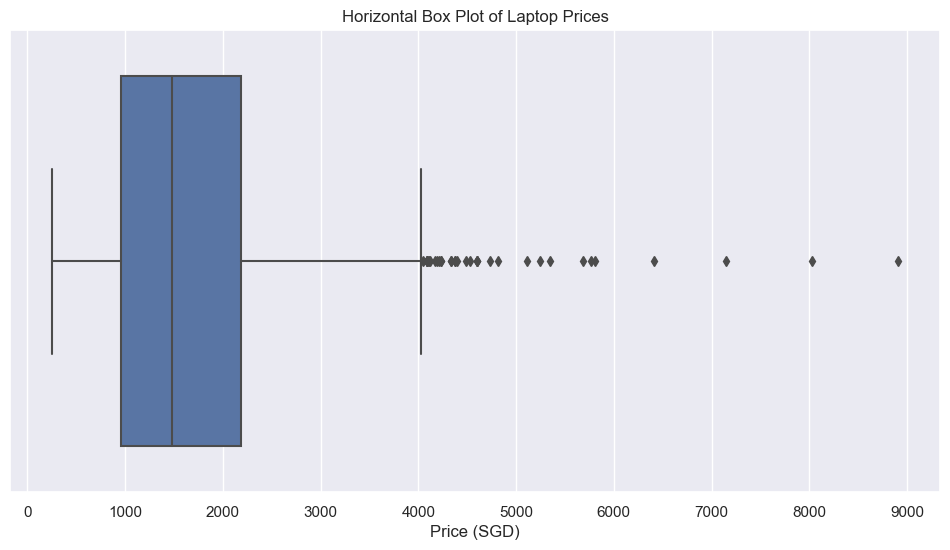

In [14]:
# Set the size of the figure
plt.figure(figsize=(12, 6))
sb.boxplot(data=laptop_dataset, x="Price_SGD")

# Adding Title and Labels 
plt.title('Horizontal Box Plot of Laptop Prices')
plt.xlabel('Price (SGD)')

# Set more markers along the x-axis for better interpretation
plt.xticks(range(0, 10000, 1000))

plt.show()

Based on the Box Plot, Laptop Prices range from about 300SGD to 4000SGD, with approximately 1400SGD as median price. 

### Bi-Variate Plots of Predictors and Price

In [15]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1217 non-null   int64  
 1   Company           1217 non-null   object 
 2   Inches            1217 non-null   float64
 3   ScreenResolution  1217 non-null   object 
 4   Cpu               1217 non-null   float64
 5   Ram               1217 non-null   int32  
 6   Memory            1217 non-null   int32  
 7   Gpu               1217 non-null   object 
 8   OpSys             1217 non-null   object 
 9   Weight            1217 non-null   float64
 10  Price_SGD         1217 non-null   float64
 11  TouchScreen       1217 non-null   object 
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 104.7+ KB


### Categorical Predictors 

Company, Screen Resolution, Gpu, OpSys, Touch Screen

In [16]:
# Categorical Predictors
laptop_dataset[['Company','ScreenResolution','Gpu', 'OpSys', 'TouchScreen']].describe()

Company ScreenResolution    Gpu       OpSys TouchScreen
count     1217             1217   1217        1217        1217
unique      19               15      4           9           2
top       Dell        1920x1080  Intel  Windows 10       False
freq       281              801    678        1006        1025

### 1. Company vs Price

In [17]:
# Unique Companies in the Dataset
print("Number of Unique Companies :", len(laptop_dataset["Company"].unique()))
print("\t")

# Print out Unique Companies 
unique_company = laptop_dataset['Company'].unique()
print(unique_company)

Number of Unique Companies : 19
	
['Apple' 'HP' 'Asus' 'Acer' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


Company
Dell         281
Lenovo       278
HP           249
Asus         149
Acer          86
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

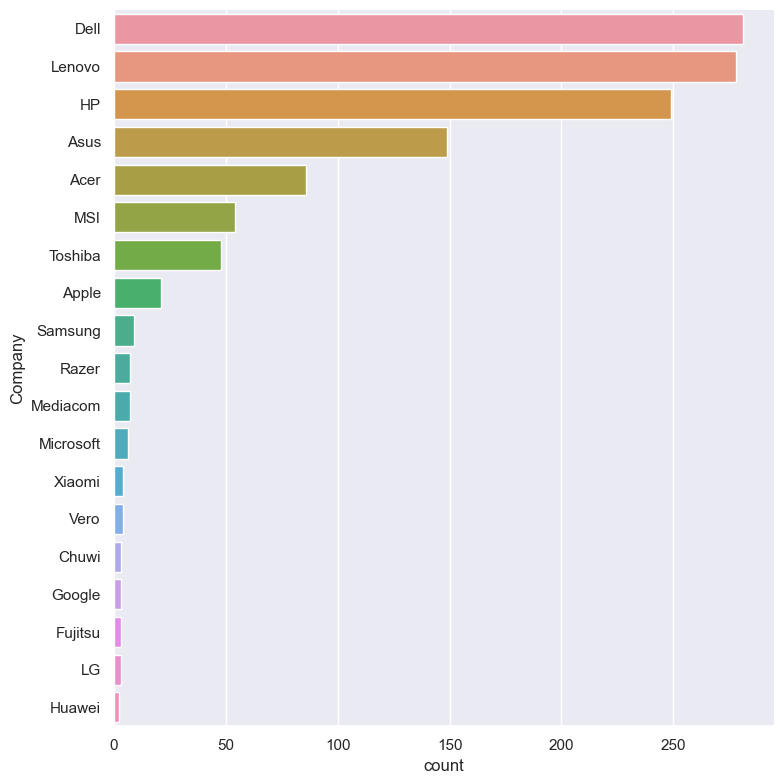

In [18]:
print(laptop_dataset["Company"].value_counts())

# Sort the unique values of "Company" in ascending order
company_order = laptop_dataset['Company'].value_counts().index
plt.figure(figsize=(10, 8))
sb.catplot(y="Company", data=laptop_dataset, kind="count", height=8, order=company_order)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


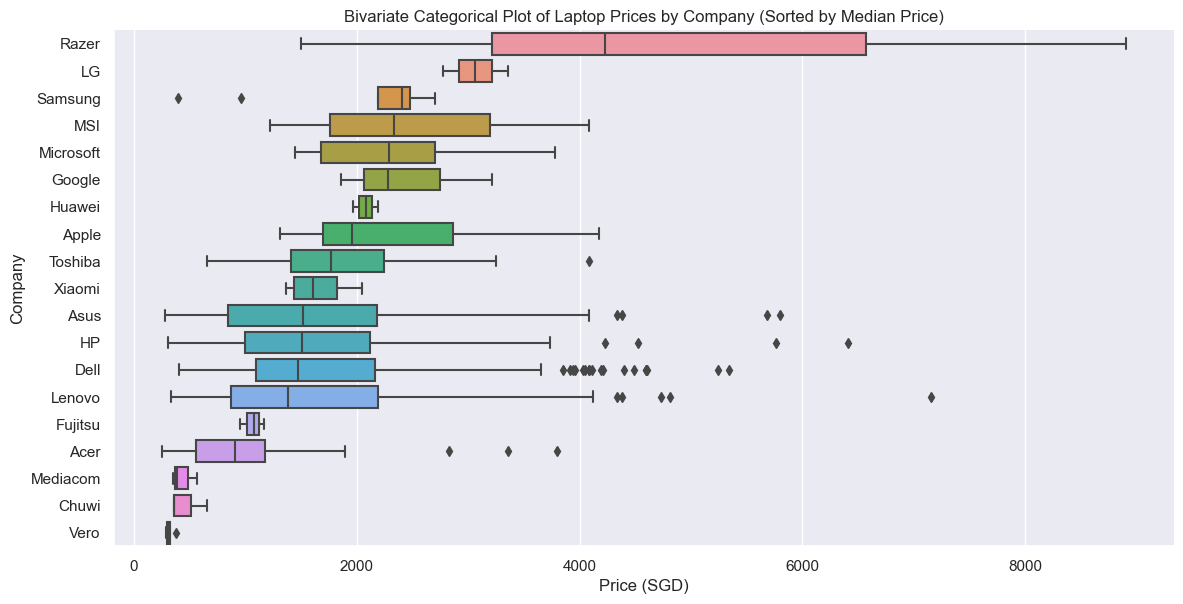

In [19]:
# Calculate median price for each company
median_prices = laptop_dataset.groupby('Company')['Price_SGD'].median().sort_values(ascending=False).index

# Create the categorical plot with adjusted size and sorted order
sb.catplot(data=laptop_dataset, x='Price_SGD', y='Company', kind='box', order=median_prices, height=6, aspect=2)

# Add title and labels
plt.title('Bivariate Categorical Plot of Laptop Prices by Company (Sorted by Median Price)')
plt.xlabel('Price (SGD)')
plt.ylabel('Company')

plt.show()

From the Categorical Box Plot, laptops from the company Razer have the highest median and generally command the highest Price. This is followed by LG, Samsung, MSI, Microsoft and etc. 

Insights: Razer is known for their gaming laptops hence specifications of laptops are naturally on the high-performing end. This may be the reason for their high median price. 

### 2. Screen Resolution vs Price

In [20]:
# Unique Screen Resolution in the Dataset
print("Number of Unique Screen Resolutions :", len(laptop_dataset["ScreenResolution"].unique()))
print("\t")

# Print out Unique Screen Resolution  
unique_ScreenResolution = laptop_dataset['ScreenResolution'].unique()
print(unique_ScreenResolution)

Number of Unique Screen Resolutions : 15
	
['2560x1600' '1440x900' '1920x1080' '2880x1800' '1366x768' '2304x1440'
 '3200x1800' '1920x1200' '2256x1504' '3840x2160' '2160x1440' '2560x1440'
 '1600x900' '2736x1824' '2400x1600']


ScreenResolution
1920x1080    801
1366x768     269
3840x2160     42
3200x1800     27
2560x1440     23
1600x900      17
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

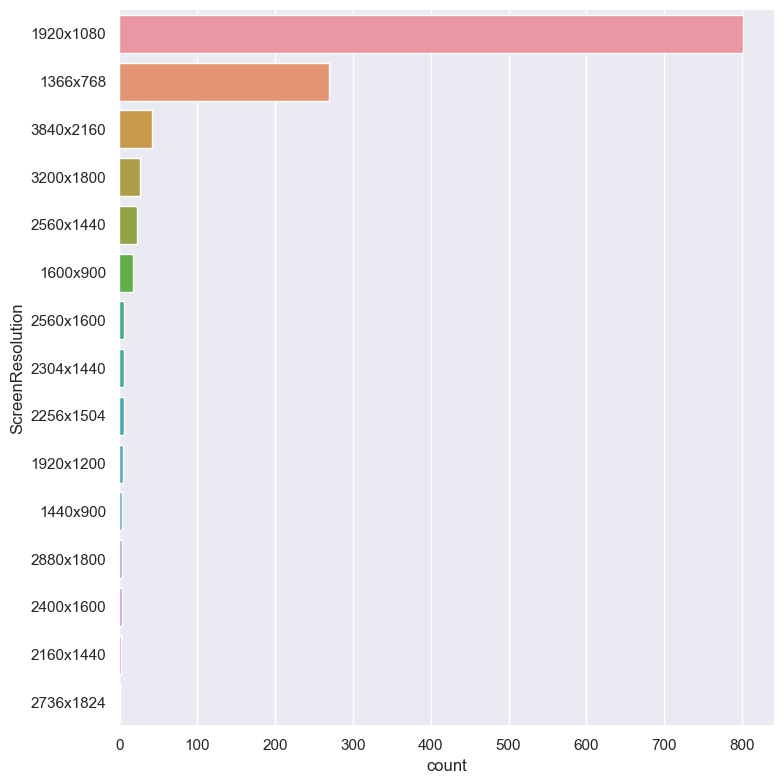

In [21]:
print(laptop_dataset["ScreenResolution"].value_counts())

# Sort the unique values of "ScreenResolution" in ascending order
ScreenResolution_order = laptop_dataset['ScreenResolution'].value_counts().index
plt.figure(figsize=(10, 8))
sb.catplot(y="ScreenResolution", data=laptop_dataset, kind="count", height=8, order=ScreenResolution_order)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


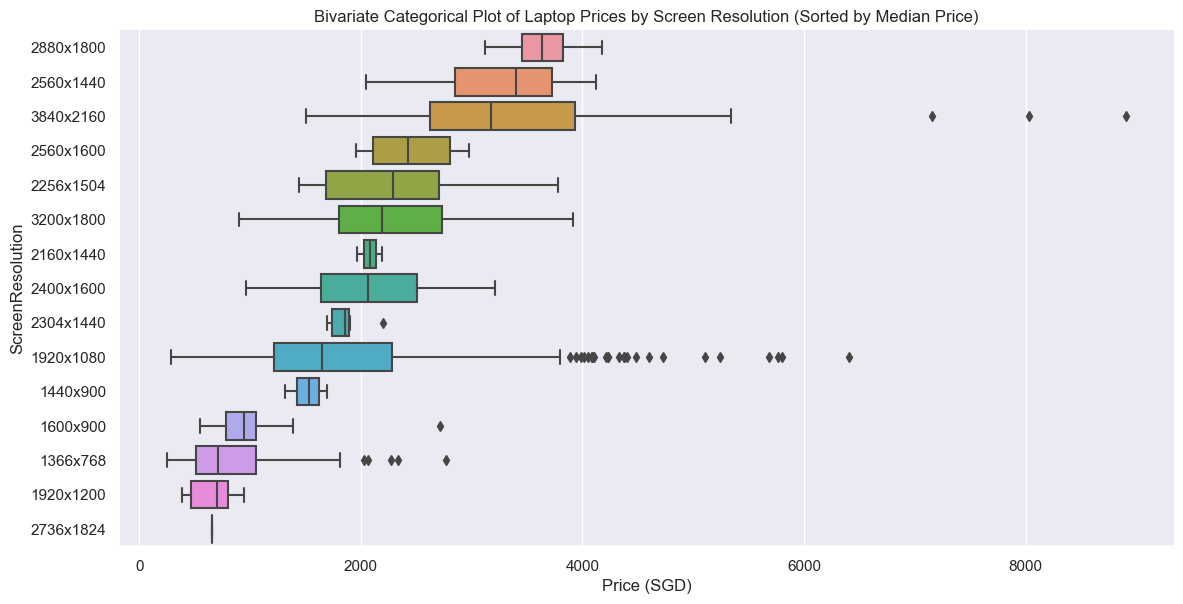

In [22]:
# Calculate median price for each company
median_prices = laptop_dataset.groupby('ScreenResolution')['Price_SGD'].median().sort_values(ascending=False).index

# Create the categorical plot with adjusted size and sorted order
sb.catplot(data=laptop_dataset, x='Price_SGD', y='ScreenResolution', kind='box', order=median_prices, height=6, aspect=2)

# Add title and labels
plt.title('Bivariate Categorical Plot of Laptop Prices by Screen Resolution (Sorted by Median Price)')
plt.xlabel('Price (SGD)')
plt.ylabel('ScreenResolution')

plt.show()

From the Categorical Box Plot, laptops with Screen Resolution 2880x1800 have the highest median and  generally command the highest Price. This is closely followed by laptops with Screen Resolution 2560x1440. Higher screen resolution typically correlates in higher median prices. However, there are some exceptions, such as the top two models. 

Insights: A possible reason for this could be as laptops that are compact and portable are preferred by consumers as compared to bulky side. Hence, to cater to the high demand, there is higher price for these two Screen Resolutions. 

### 3. Gpu and Price

In [23]:
# Unique Gpu in the Dataset
print("Number of Unique Gpu :", len(laptop_dataset["Gpu"].unique()))
print("\t")

# Print out Unique Gpu  
unique_Gpu = laptop_dataset['Gpu'].unique()
print(unique_Gpu)

Number of Unique Gpu : 4
	
['Intel' 'AMD' 'Nvidia' 'ARM']


Gpu
Intel     678
Nvidia    390
AMD       148
ARM         1
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

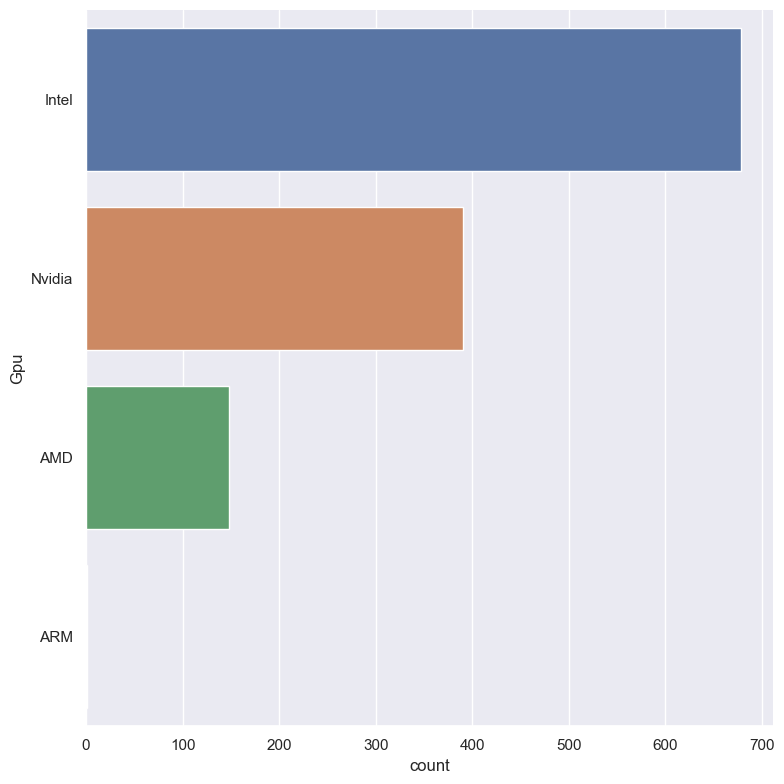

In [24]:
print(laptop_dataset["Gpu"].value_counts())

# Sort the unique values of "Gpu" in ascending order
Gpu_order = laptop_dataset['Gpu'].value_counts().index
plt.figure(figsize=(10, 8))
sb.catplot(y="Gpu", data=laptop_dataset, kind="count", height=8, order=Gpu_order)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


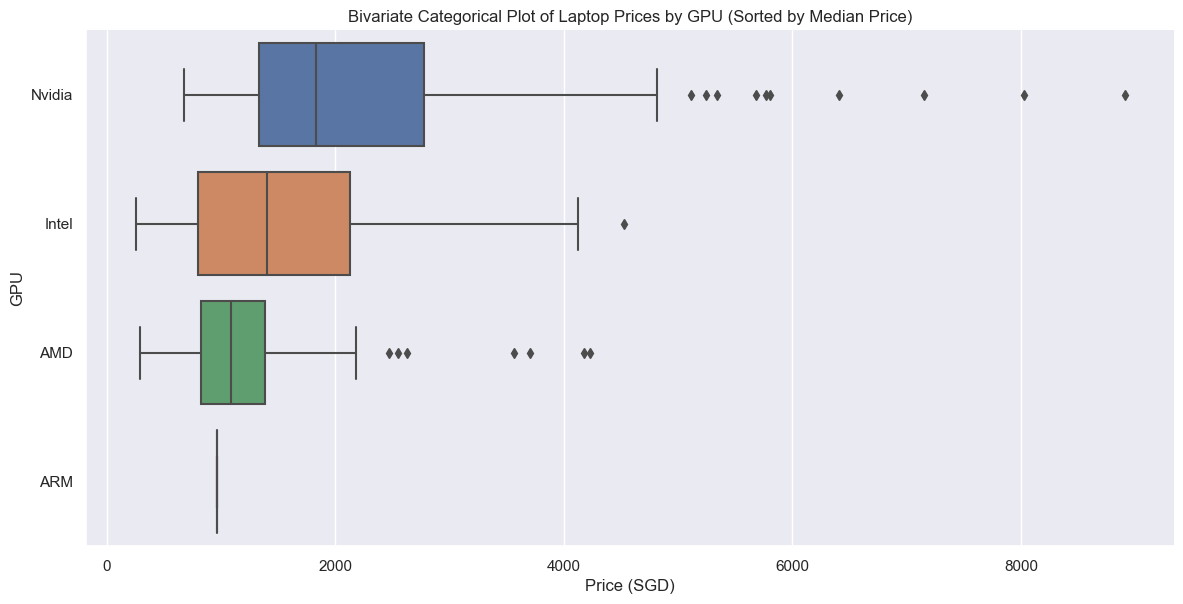

In [25]:
# Calculate median price for each GPU
median_prices = laptop_dataset.groupby('Gpu')['Price_SGD'].median().sort_values(ascending=False).index

# Create the categorical plot with adjusted size and sorted order
sb.catplot(data=laptop_dataset, x='Price_SGD', y='Gpu', kind='box', order=median_prices, height=6, aspect=2)

# Add title and labels
plt.title('Bivariate Categorical Plot of Laptop Prices by GPU (Sorted by Median Price)')
plt.xlabel('Price (SGD)')
plt.ylabel('GPU')

plt.show()

From the Categorical Box Plot, laptops with Gpu from Nvidia have the highest median and hence generally commands the highest Price. This is followed by Intel, AMD and finally ARM. 

Insights: Nividia is known for its high-performance GPUs, which are commonly used in gaming laptops. As compared to Intel, AMD and ARM, who cater more mid-performance GPUs to everyday users, it makes sense for them to command a higher price for their more expensive chips. 

### 4. OpSys and Price

In [26]:
# Unique OpSys in the Dataset
print("Number of Unique OpSys :", len(laptop_dataset["OpSys"].unique()))
print("\t")

# Print out Unique OpSys  
unique_OpSys = laptop_dataset['OpSys'].unique()
print(unique_OpSys)

Number of Unique OpSys : 9
	
['macOS' 'No OS' 'Mac OS X' 'Windows 10' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


OpSys
Windows 10      1006
Linux             55
No OS             53
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

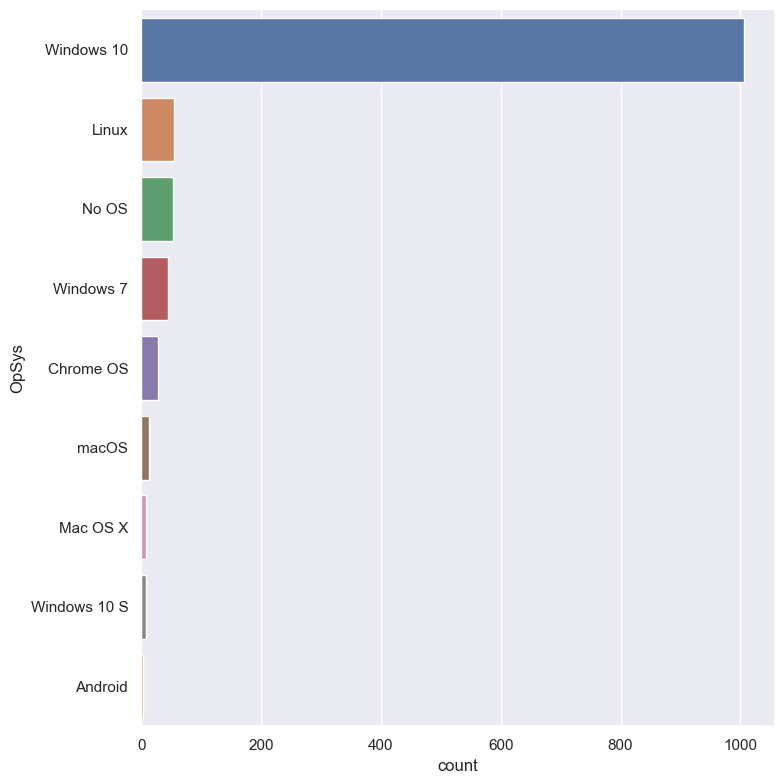

In [27]:
print(laptop_dataset["OpSys"].value_counts())

# Sort the unique values of "OpSys" in ascending order
OpSys_order = laptop_dataset['OpSys'].value_counts().index
plt.figure(figsize=(10, 8))
sb.catplot(y="OpSys", data=laptop_dataset, kind="count", height=8, order=OpSys_order)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


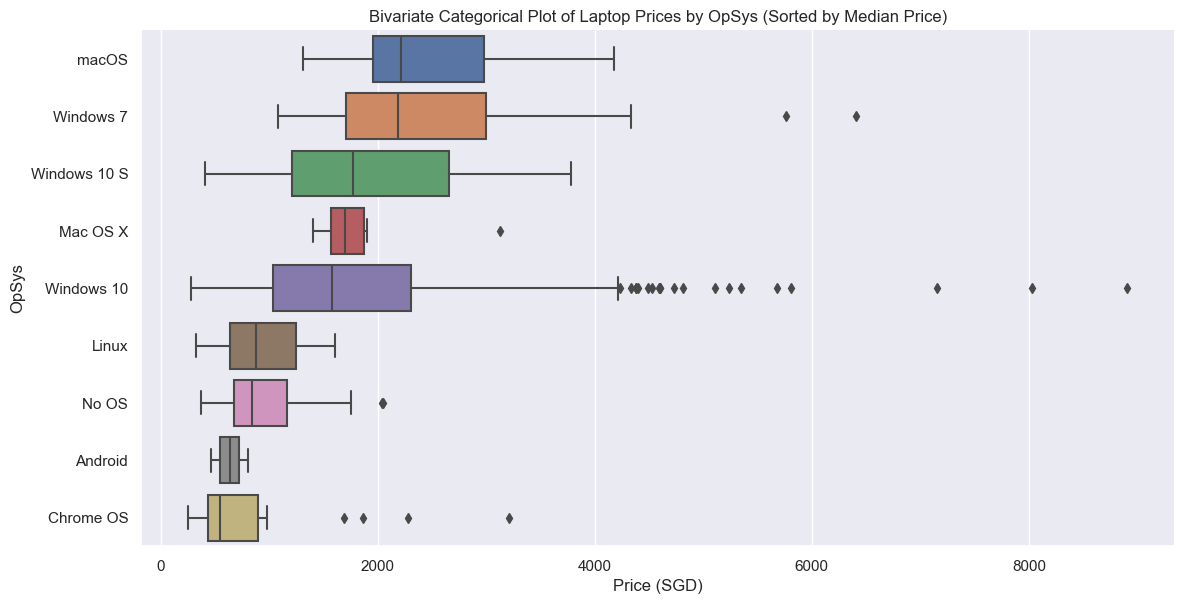

In [28]:
# Calculate median price for each OpSys
median_prices = laptop_dataset.groupby('OpSys')['Price_SGD'].median().sort_values(ascending=False).index

# Create the categorical plot with adjusted size and sorted order
sb.catplot(data=laptop_dataset, x='Price_SGD', y='OpSys', kind='box', order=median_prices, height=6, aspect=2)

# Add title and labels
plt.title('Bivariate Categorical Plot of Laptop Prices by OpSys (Sorted by Median Price)')
plt.xlabel('Price (SGD)')
plt.ylabel('OpSys')

plt.show()

From the Categorical Box Plot, Laptops with macOS have a highest median and hence generally command the highest Price. This is followed by Windows 7, Windows 10s, Mac OS X, Windows 10, Linux, No OS, Android and lastly, Chrome OS. Laptops with Windows 10 however, have the most outliers, with outlier laptops nearing 10000 SGD. 

Insights: In our dataset, a significantly large portion of laptops have Windows 10, hence, it is explainable that laptops with windows have a large range of prices. This is as everyday use laptops and gaming laptops are categorized together. 

### 5. TouchScreen and Price

TouchScreen
False    1025
True      192
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

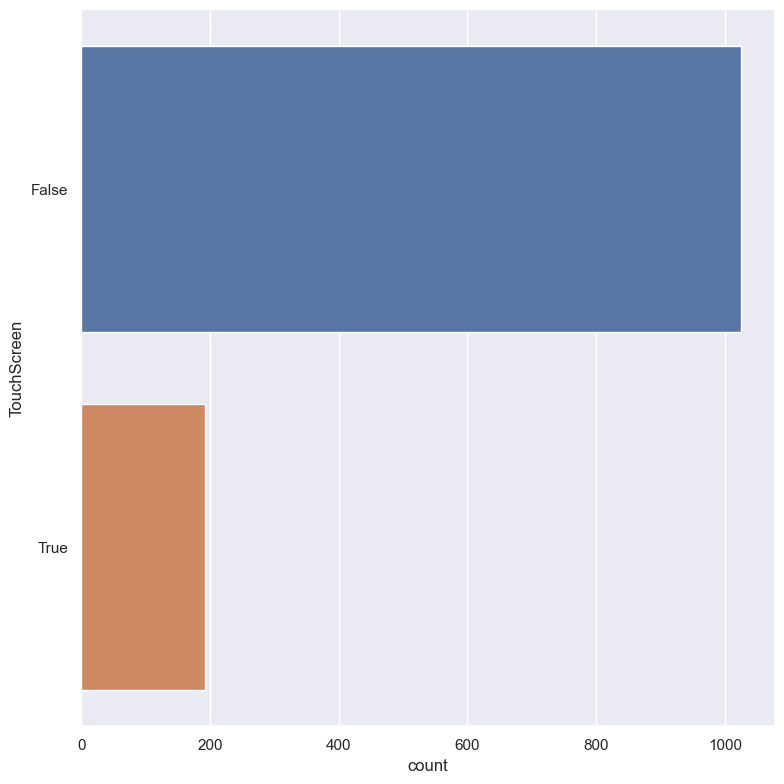

In [29]:
print(laptop_dataset["TouchScreen"].value_counts())

# Sort the unique values of "TouchScreen" in ascending order
TouchScreen_order = laptop_dataset['TouchScreen'].value_counts().index
plt.figure(figsize=(10, 8))
sb.catplot(y="TouchScreen", data=laptop_dataset, kind="count", height=8, order=TouchScreen_order)

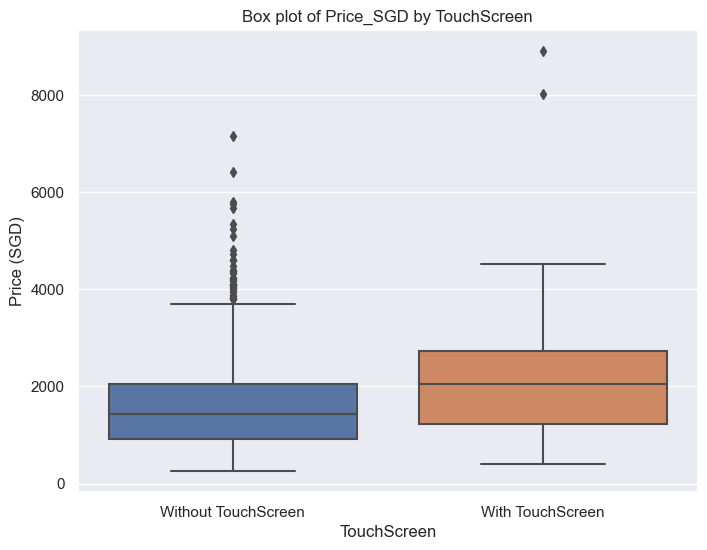

In [30]:
# Relationship with other variables - Box plot with Price_SGD
plt.figure(figsize=(8, 6))
sb.boxplot(data=laptop_dataset, x='TouchScreen', y='Price_SGD')
plt.title('Box plot of Price_SGD by TouchScreen')
plt.xlabel('TouchScreen')
plt.ylabel('Price (SGD)')
plt.xticks(ticks=[0, 1], labels=['Without TouchScreen', 'With TouchScreen'])
plt.show()

From the Categorical Box Plot, we can conclude Laptops with Touch Screens have a higher median and hence generally command higher Price. Another interesting find is that laptops without Touch Screens have many outliers as compared to laptops with Touch Screens.

Insights: Touchscreens are considered a "premium add-on" feature that is optional to users. Hence, given its demand and its additional implemented software, it makes sense it has a higher price. 

As for a possible reason why laptops without Touchscreens have many outliers, it could be as they are gaming laptops. Buyers of gaming laptops don't often get Touchscreen function but they buy higher specifications and hence the higher price is due to the higher specs for other features of the laptop. 

### Numerical Predictors

Inches, Cpu, Ram, Memory, Weight

In [31]:
# Numeric Predictors
laptop_dataset[['Inches','Cpu','Ram', 'Memory', 'Weight']].describe()

Inches          Cpu          Ram       Memory       Weight
count  1217.000000  1217.000000  1217.000000  1217.000000  1217.000000
mean     14.967214     2.304273     8.609696   229.365653     2.030099
std       1.448678     0.511743     5.142029   172.818371     0.681738
min      10.100000     0.900000     2.000000     1.000000     0.690000
25%      14.000000     1.800000     4.000000   128.000000     1.490000
50%      15.600000     2.500000     8.000000   256.000000     2.020000
75%      15.600000     2.700000     8.000000   256.000000     2.310000
max      18.400000     3.600000    64.000000   512.000000     4.700000

In [32]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(laptop_dataset[["Inches", "Cpu", "Ram", "Memory", "Weight", "Price_SGD"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

Inches      Cpu      Ram   Memory   Weight  Price_SGD
count  1217.00  1217.00  1217.00  1217.00  1217.00    1217.00
mean     14.97     2.30     8.61   229.37     2.03    1696.93
std       1.45     0.51     5.14   172.82     0.68    1021.17
min      10.10     0.90     2.00     1.00     0.69     254.04
25%      14.00     1.80     4.00   128.00     1.49     959.22
50%      15.60     2.50     8.00   256.00     2.02    1477.51
75%      15.60     2.70     8.00   256.00     2.31    2188.54
max      18.40     3.60    64.00   512.00     4.70    8904.54

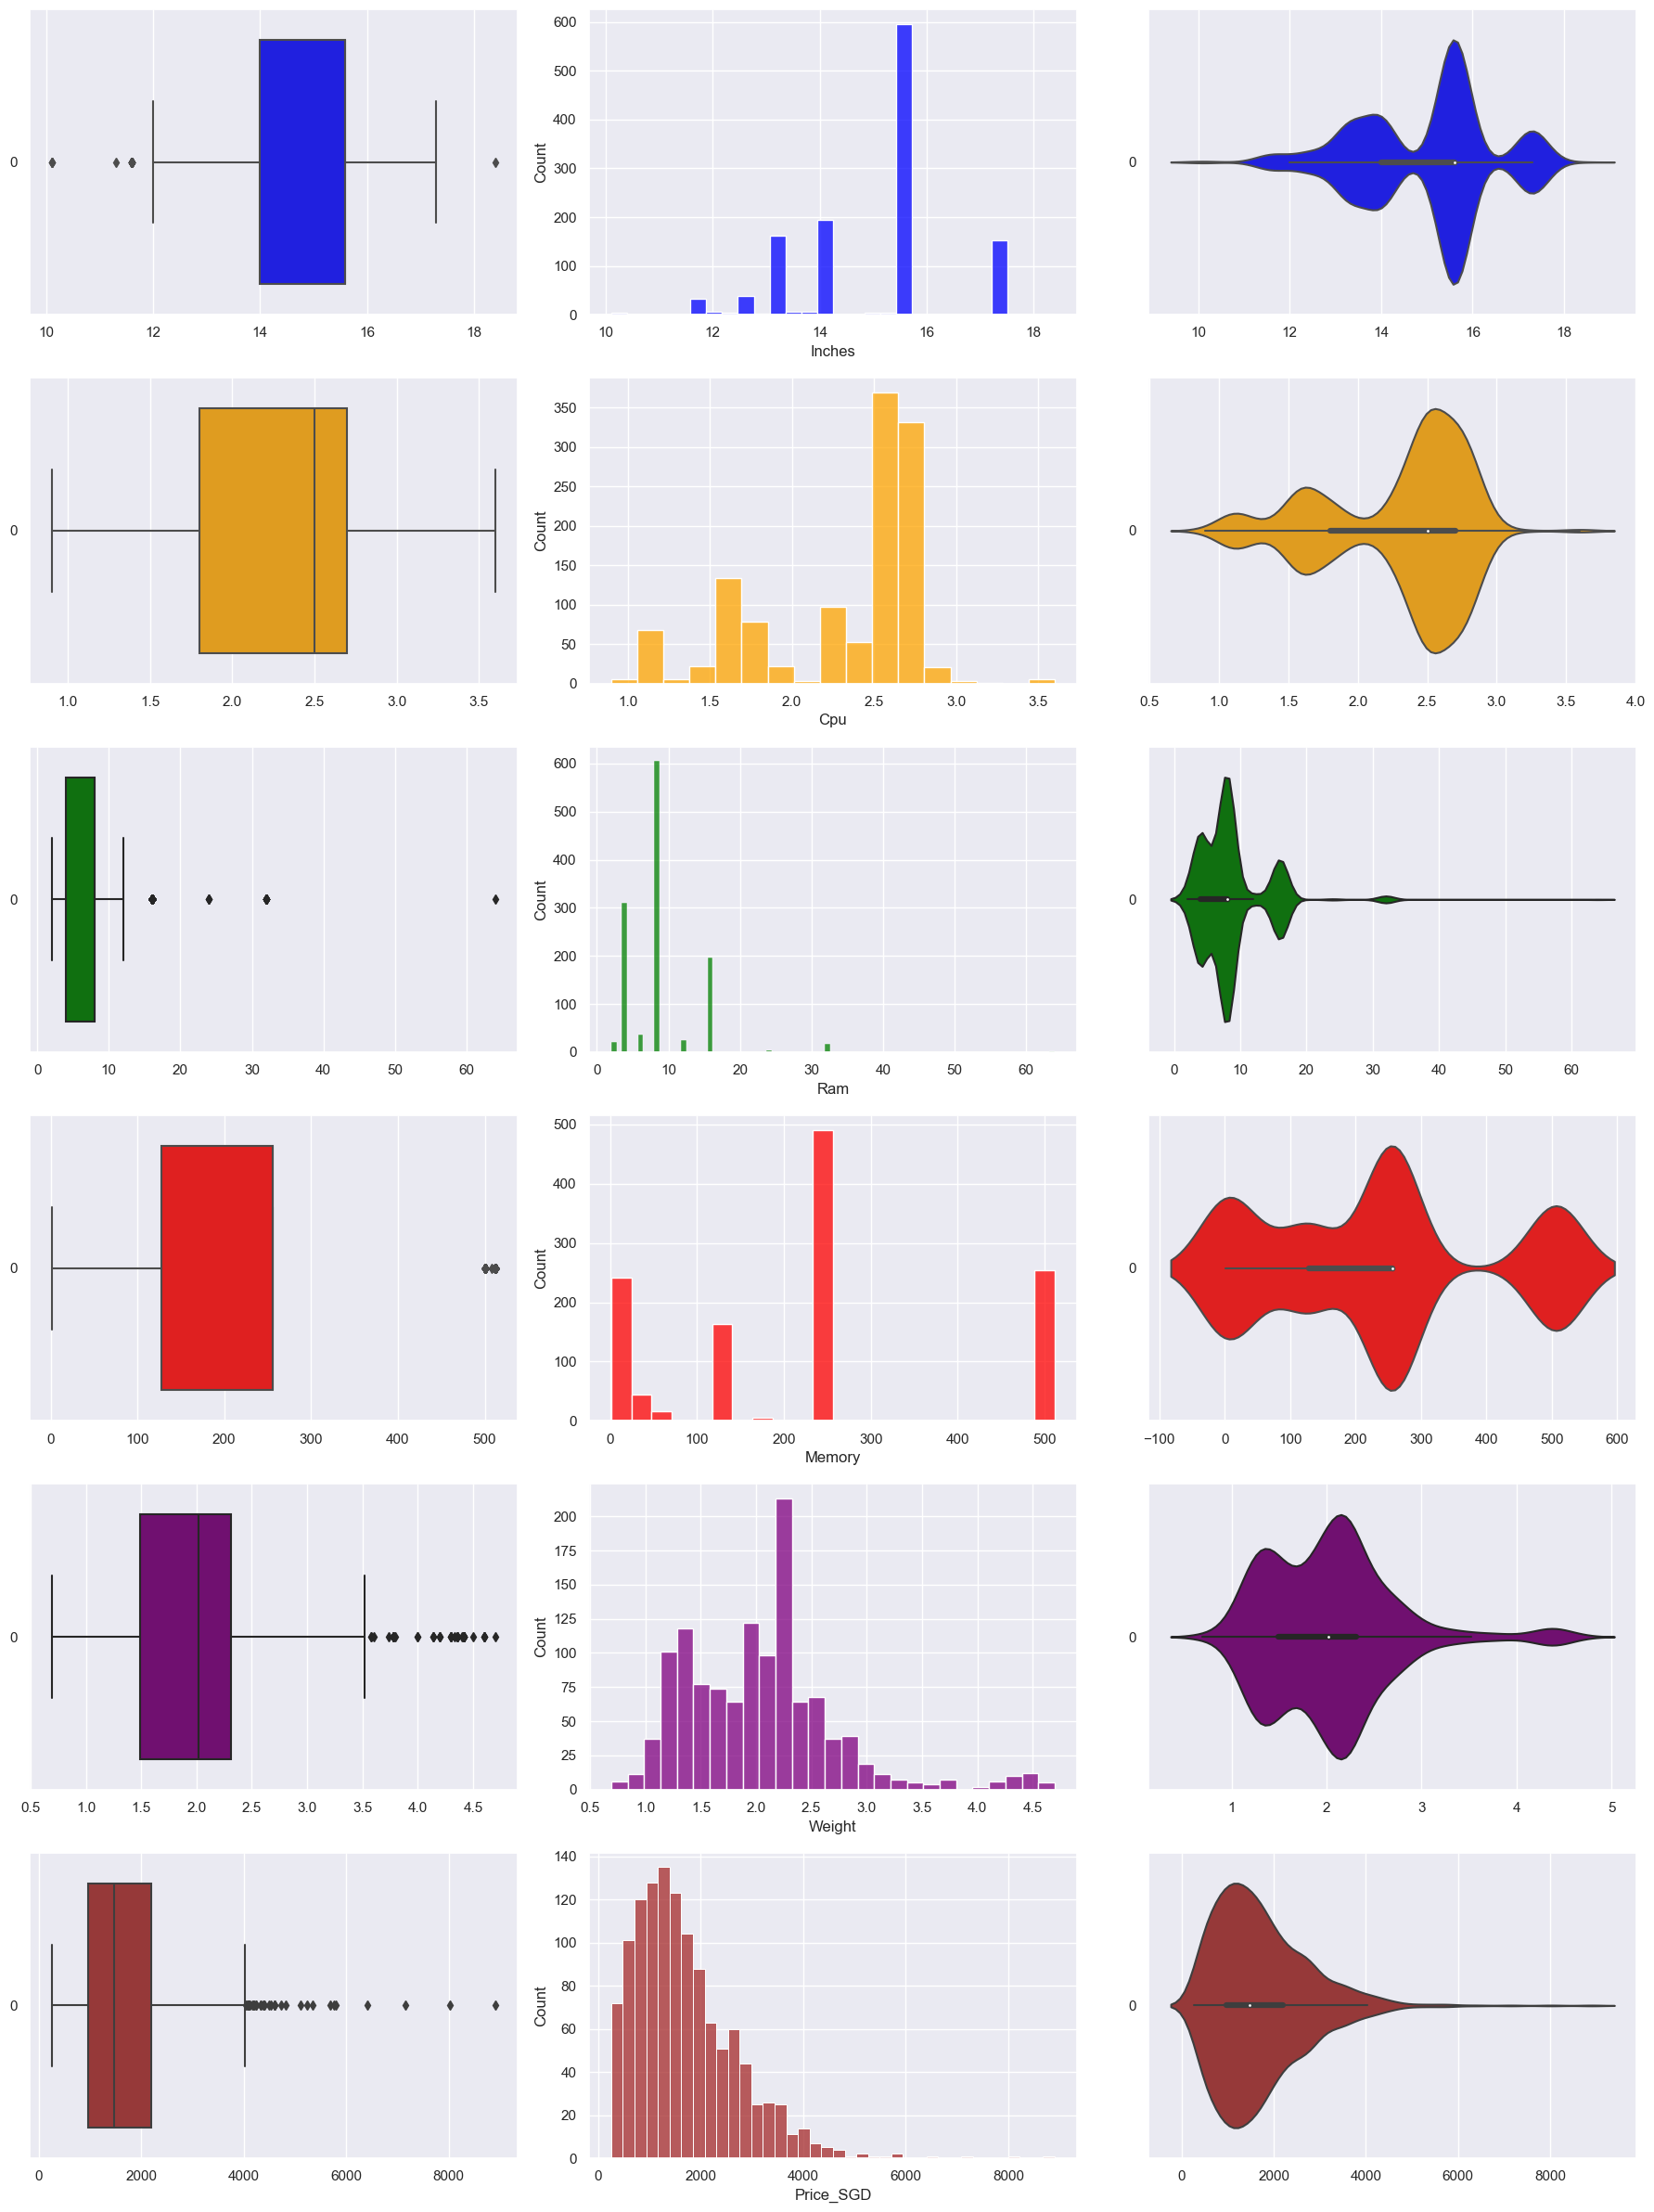

In [33]:
# Draw the distributions of all variables against Count 
f, axes = plt.subplots(6, 3, figsize=(18, 24))

# Define a list of colors for each variable
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

count = 0

for var in numeric_data:
    sb.boxplot(data=numeric_data[var], orient="h", color=colors[count % len(colors)], ax=axes[count, 0])
    sb.histplot(data=numeric_data[var], color=colors[count % len(colors)], ax=axes[count, 1])
    sb.violinplot(data=numeric_data[var], orient="h", color=colors[count % len(colors)], ax=axes[count, 2])
    count += 1

plt.tight_layout()
plt.show()

             Inches       Cpu       Ram    Memory    Weight  Price_SGD
Inches     1.000000  0.322161  0.265189 -0.091439  0.831341   0.096985
Cpu        0.322161  1.000000  0.367084  0.102837  0.326716   0.432642
Ram        0.265189  0.367084  1.000000  0.186770  0.395338   0.733489
Memory    -0.091439  0.102837  0.186770  1.000000 -0.106299   0.307030
Weight     0.831341  0.326716  0.395338 -0.106299  1.000000   0.220692
Price_SGD  0.096985  0.432642  0.733489  0.307030  0.220692   1.000000


<Axes: >

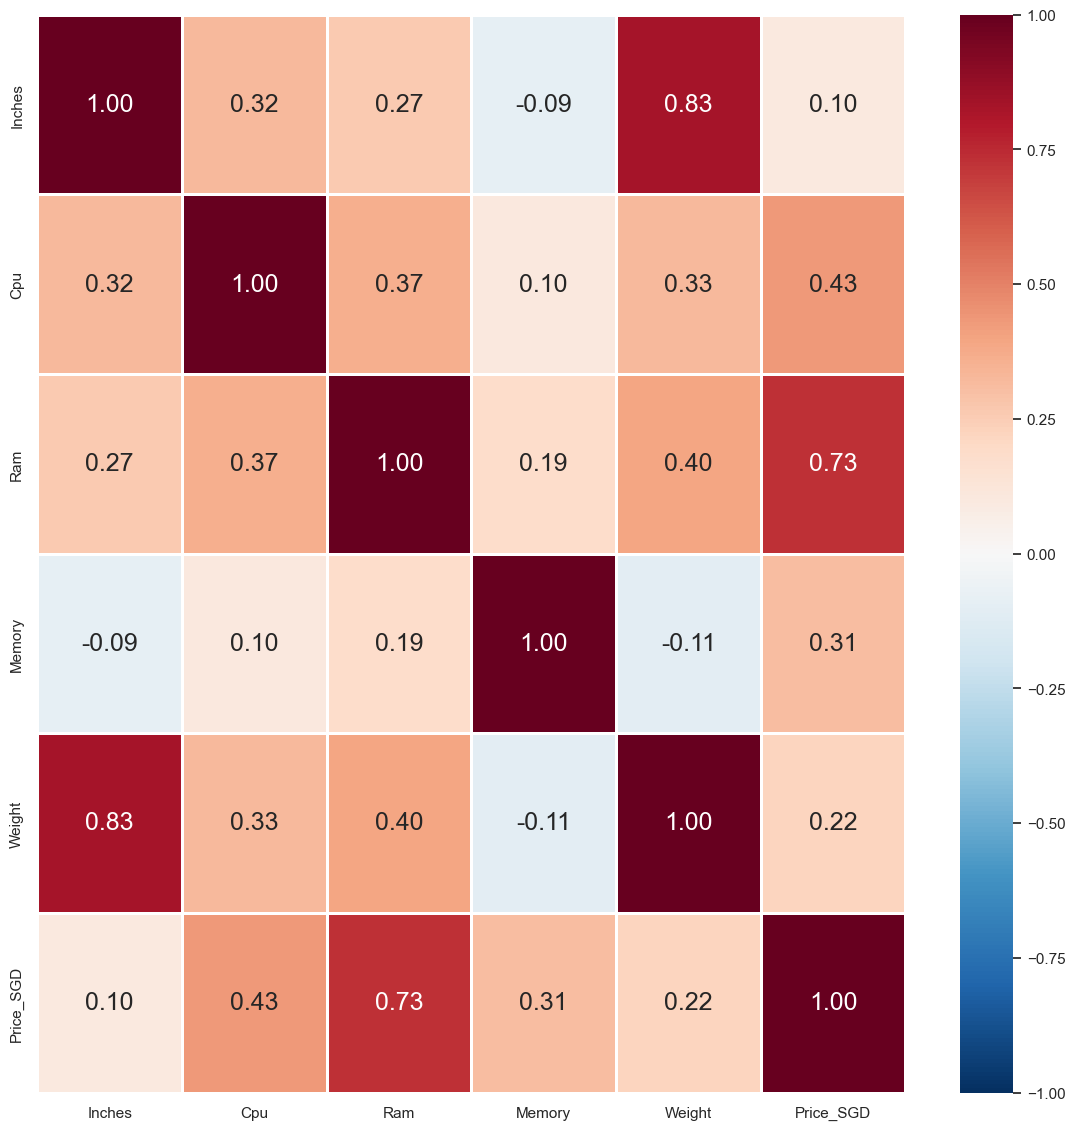

In [34]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(14, 14))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu_r")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


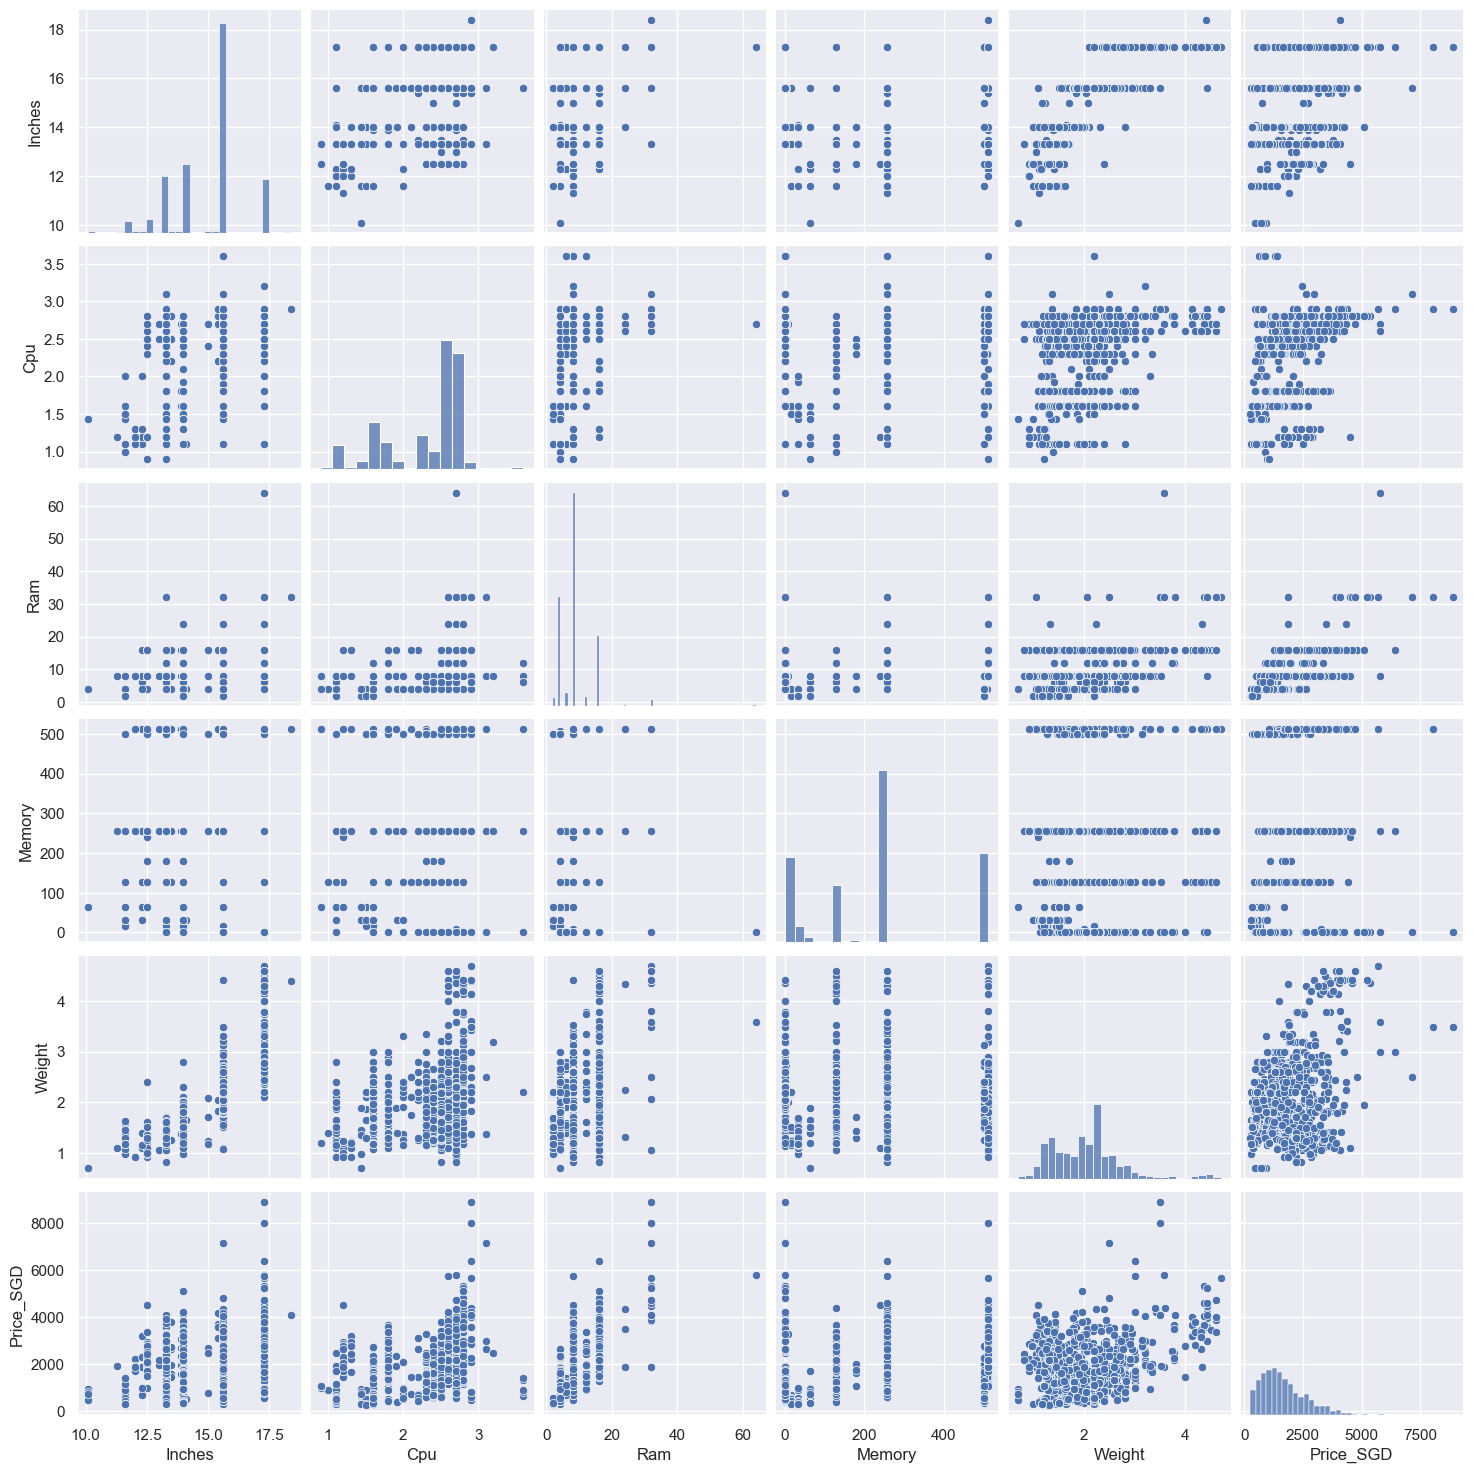

In [35]:
# Scatter Plot
sb.pairplot(data = numeric_data)

From the correlation table and the heatmap, we can conclude all numerical variables are positively related to Price of Laptops. Ram (0.73) followed by Cpu (0.43) have the highest correlation to Price. Ram, however is significantly higher than the Cpu, making it the most important numerical variable in  the prediction of the Price of Laptops.

Insights: Ram determines the performance of a laptop, hence this supports the findings that it has the closest correlation to Price. Laptops with high-performance are mostly all supported by a high Ram. 

## Findings from Exploratory Data Analysis

Laptop Prices range from about 300 SGD to 4000 SGD, with approximately 1400 SGD as median price. There exists outliers with Laptop Price nearing 9000 SGD. 

Insights: The categorical variables Gpu and Touchscreen as well as the numerical variable Ram have the greatest correlation to price. 

For the categorical variables company, ScreenResolution and Opsys, though they had correlations to price, it was not significant towards our data set. Company against Price was not as spaced out it is less significant to the other variables. As for Screen Resolution and Opsys, a large proportion of our data was skewed towards two screen resolutions and one operating system. Hence, when evaluating the impact on price on the dataset as a whole, the impact of these categorical variables is not as significant as compared to Gpu and Touchscreen.

As for numerical variables, Ram recorded the highest correlation (0.73) to Price. The second highest was significantly lower (0.43) hence we took Ram as the variable with a much higher correlation to Price. 

## Machine Learning Techniques to predict Price 

### Multi-Variate Linear Regression

Response Variable : **Price_SGD**     
Predictor Feature : **Company, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight**       

#### Encoding Categorical variables by Integers (OneHotEncoding)

In [36]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
laptop_data_cat = laptop_dataset[['Company','ScreenResolution','Gpu', 'OpSys', 'TouchScreen']]
ohe.fit(laptop_data_cat)
laptop_data_catohe = pd.DataFrame(ohe.transform(laptop_data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(laptop_data_cat.columns))

# Check the encoded variables
laptop_data_catohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1217 non-null   float64
 1   Company_Apple               1217 non-null   float64
 2   Company_Asus                1217 non-null   float64
 3   Company_Chuwi               1217 non-null   float64
 4   Company_Dell                1217 non-null   float64
 5   Company_Fujitsu             1217 non-null   float64
 6   Company_Google              1217 non-null   float64
 7   Company_HP                  1217 non-null   float64
 8   Company_Huawei              1217 non-null   float64
 9   Company_LG                  1217 non-null   float64
 10  Company_Lenovo              1217 non-null   float64
 11  Company_MSI                 1217 non-null   float64
 12  Company_Mediacom            1217 non-null   float64
 13  Company_Microsoft           1217 

In [37]:
# Combining Numeric features with the OHE Categorical features
laptop_data_num = laptop_dataset[['Inches', 'Cpu', 'Ram', 'Memory', 'Weight']]
laptop_data_res = laptop_dataset['Price_SGD'] #variable we want to predict
laptop_data_ohe = pd.concat([laptop_data_num, laptop_data_catohe, laptop_data_res], 
                           sort = False, axis = 1).reindex(index=laptop_data_num.index)

# Check the final dataframe
laptop_data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Inches                      1217 non-null   float64
 1   Cpu                         1217 non-null   float64
 2   Ram                         1217 non-null   int32  
 3   Memory                      1217 non-null   int32  
 4   Weight                      1217 non-null   float64
 5   Company_Acer                1217 non-null   float64
 6   Company_Apple               1217 non-null   float64
 7   Company_Asus                1217 non-null   float64
 8   Company_Chuwi               1217 non-null   float64
 9   Company_Dell                1217 non-null   float64
 10  Company_Fujitsu             1217 non-null   float64
 11  Company_Google              1217 non-null   float64
 12  Company_HP                  1217 non-null   float64
 13  Company_Huawei              1217 

In [38]:
laptop_data_ohe.head()

Inches  Cpu  Ram  Memory  Weight  Company_Acer  Company_Apple  \
0    13.3  2.3    8     128    1.37           0.0            1.0   
1    13.3  1.8    8     128    1.34           0.0            1.0   
2    15.6  2.5    8     256    1.86           0.0            0.0   
3    15.4  2.7   16     512    1.83           0.0            1.0   
4    13.3  3.1    8     256    1.37           0.0            1.0   

   Company_Asus  Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  \
0           0.0            0.0           0.0              0.0             0.0   
1           0.0            0.0           0.0              0.0             0.0   
2           0.0            0.0           0.0              0.0             0.0   
3           0.0            0.0           0.0              0.0             0.0   
4           0.0            0.0           0.0              0.0             0.0   

   Company_HP  Company_Huawei  Company_LG  Company_Lenovo  Company_MSI  \
0         0.0             0.0         0.0             0.0          0.0   
1         0.0             0.0         0.0             0.0          0.0   
2         1.0             0.0         0.0             0.0          0.0   
3         0.0             0.0         0.0             0.0          0.0   
4         0.0             0.0         0.0             0.0          0.0   

   Company_Mediacom  Company_Microsoft  Company_Razer  Company_Samsung  \
0               0.0                0.0            0.0              0.0   
1               0.0                0.0            0.0              0.0   
2               0.0                0.0            0.0              0.0   
3               0.0                0.0            0.0              0.0   
4               0.0                0.0            0.0              0.0   

   Company_Toshiba  Company_Vero  Company_Xiaomi  ScreenResolution_1366x768  \
0              0.0           0.0             0.0                        0.0   
1              0.0           0.0             0.0                        0.0   
2              0.0           0.0             0.0                        0.0   
3              0.0           0.0             0.0                        0.0   
4              0.0           0.0             0.0                        0.0   

   ScreenResolution_1440x900  ScreenResolution_1600x900  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   ScreenResolution_1920x1080  ScreenResolution_1920x1200  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         1.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   ScreenResolution_2160x1440  ScreenResolution_2256x1504  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   ScreenResolution_2304x1440  ScreenResolution_2400x1600  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   ScreenResolution_2560x1440  ScreenResolution_2560x1600  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0             

#### Creating and Fitting Model

In [39]:
# Extract Response and Predictors
predictors = ['Inches', 'Cpu', 'Ram', 'Memory', 'Weight', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'ScreenResolution_1366x768', 'ScreenResolution_1440x900', 'ScreenResolution_1600x900', 'ScreenResolution_1920x1080', 'ScreenResolution_1920x1200', 'ScreenResolution_2160x1440', 'ScreenResolution_2256x1504', 'ScreenResolution_2304x1440', 'ScreenResolution_2400x1600', 'ScreenResolution_2560x1440', 'ScreenResolution_2560x1600', 'ScreenResolution_2736x1824', 'ScreenResolution_2880x1800', 'ScreenResolution_3200x1800', 'ScreenResolution_3840x2160', 'Gpu_AMD', 'Gpu_ARM', 'Gpu_Intel', 'Gpu_Nvidia', 'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'TouchScreen_False', 'TouchScreen_True']
y = pd.DataFrame(laptop_data_ohe["Price_SGD"])
X = pd.DataFrame(laptop_data_ohe[predictors])

In [40]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (912, 1) (912, 54)
Test Set  : (305, 1) (305, 54)


#### Basic Exploration on Train Set

In [41]:
# Summary Statistics for Response
y_train.describe()

Price_SGD
count   912.000000
mean   1706.379638
std    1020.715896
min     280.170000
25%     962.140000
50%    1501.420000
75%    2188.540000
max    8904.540000

In [42]:
# Summary Statistics for Predictors
X_train.describe()

Inches         Cpu         Ram      Memory      Weight  \
count  912.000000  912.000000  912.000000  912.000000  912.000000   
mean    14.972917    2.301447    8.708333  226.065789    2.039770   
std      1.482070    0.504870    5.194189  171.610253    0.683672   
min     10.100000    0.900000    2.000000    1.000000    0.690000   
25%     14.000000    1.800000    4.000000   64.000000    1.490000   
50%     15.600000    2.500000    8.000000  256.000000    2.040000   
75%     15.600000    2.700000    8.000000  256.000000    2.360000   
max     17.300000    3.600000   64.000000  512.000000    4.600000   

       Company_Acer  Company_Apple  Company_Asus  Company_Chuwi  Company_Dell  \
count    912.000000     912.000000    912.000000     912.000000    912.000000   
mean       0.067982       0.019737      0.132675       0.001096      0.234649   
std        0.251854       0.139171      0.339410       0.033113      0.424012   
min        0.000000       0.000000      0.000000       0.000000      0.000000   
25%        0.000000       0.000000      0.000000       0.000000      0.000000   
50%        0.000000       0.000000      0.000000       0.000000      0.000000   
75%        0.000000       0.000000      0.000000       0.000000      0.000000   
max        1.000000       1.000000      1.000000       1.000000      1.000000   

       Company_Fujitsu  Company_Google  Company_HP  Company_Huawei  \
count       912.000000      912.000000  912.000000      912.000000   
mean          0.002193        0.001096    0.207237        0.001096   
std           0.046804        0.033113    0.405549        0.033113   
min           0.000000        0.000000    0.000000        0.000000   
25%           0.000000        0.000000    0.000000        0.000000   
50%           0.000000        0.000000    0.000000        0.000000   
75%           0.000000        0.000000    0.000000        0.000000   
max           1.000000        1.000000    1.000000        1.000000   

       Company_LG  Company_Lenovo  Company_MSI  Company_Mediacom  \
count  912.000000      912.000000   912.000000        912.000000   
mean     0.002193        0.212719     0.048246          0.006579   
std      0.046804        0.409455     0.214402          0.080888   
min      0.000000        0.000000     0.000000          0.000000   
25%      0.000000        0.000000     0.000000          0.000000   
50%      0.000000        0.000000     0.000000          0.000000   
75%      0.000000        0.000000     0.000000          0.000000   
max      1.000000        1.000000     1.000000          1.000000   

       Company_Microsoft  Company_Razer  Company_Samsung  Company_Toshiba  \
count         912.000000     912.000000       912.000000       912.000000   
mean            0.006579       0.005482         0.008772         0.033991   
std             0.080888       0.073881         0.093298         0.181306   
min             0.000000       0.000000         0.000000         0.000000   
25%             0.000000       0.000000         0.000000         0.000000   
50%             0.000000       0.000000         0.000000         0.000000   
75%             0.000000       0.000000         0.000000         0.000000   
max             1.000000       1.000000         1.000000         1.000000   

       Company_Vero  Company_Xiaomi  ScreenResolution_1366x768  \
count    912.000000      912.000000                 912.000000   
mean       0.004386        0.003289                   0.210526   
std        0.066117        0.057291                   0.407906   
min        0.000000        0.000000                   0.000000   
25%        0.000000        0.000000                   0.000000   
50%        0.000000        0.000000                   0.000000   
75%        0.000000        0.000000                   0.000000   
max        1.000000        1.000000                   1.000000   

       ScreenResolution_1440x900  ScreenResolution_1600x900  \
count                 912.000000                 912.000000   


#### Predicting Price using our Regression Model 

Intercept of Regression 	: b =  [1568.22162631]
Coefficients of Regression 	: a =  [[-1.23648637e+02  2.74437958e+02  8.97800210e+01  4.97808831e-01
   2.51527552e+02 -4.05350511e+02  3.13441397e+02 -2.14012142e+02
  -6.53185313e+02 -8.40010356e+01 -1.89645989e+02  4.68476889e+02
  -2.32436942e+01  2.09306928e+01  1.11654028e+03 -2.04276726e+02
   8.93721884e+01 -6.22479003e+02  2.18922942e+02  5.48465868e+02
   1.64977656e+02  7.63573625e+00 -5.73302270e+02  2.07330311e+01
  -4.71338116e+02 -6.81951693e+02 -2.06867937e+02 -9.48197214e+01
  -3.98489735e+02  2.09306928e+01  2.18922942e+02 -3.16176437e+02
   7.98449090e+01  1.07201011e+03 -1.69580970e+02 -1.70862860e+02
   3.94439573e+02  1.67822285e+02  5.56116961e+02 -5.99958019e+01
  -3.88631980e+02  2.07906035e+02  2.40721747e+02 -2.46543989e+02
  -1.50526046e+02 -1.82303719e+02  1.48731187e+01 -3.88764132e+02
  -4.27196565e+00 -3.32153817e+01  6.92183837e+02  2.98568278e+02
   4.05049609e+00 -4.05049609e+00]]

                    Pr

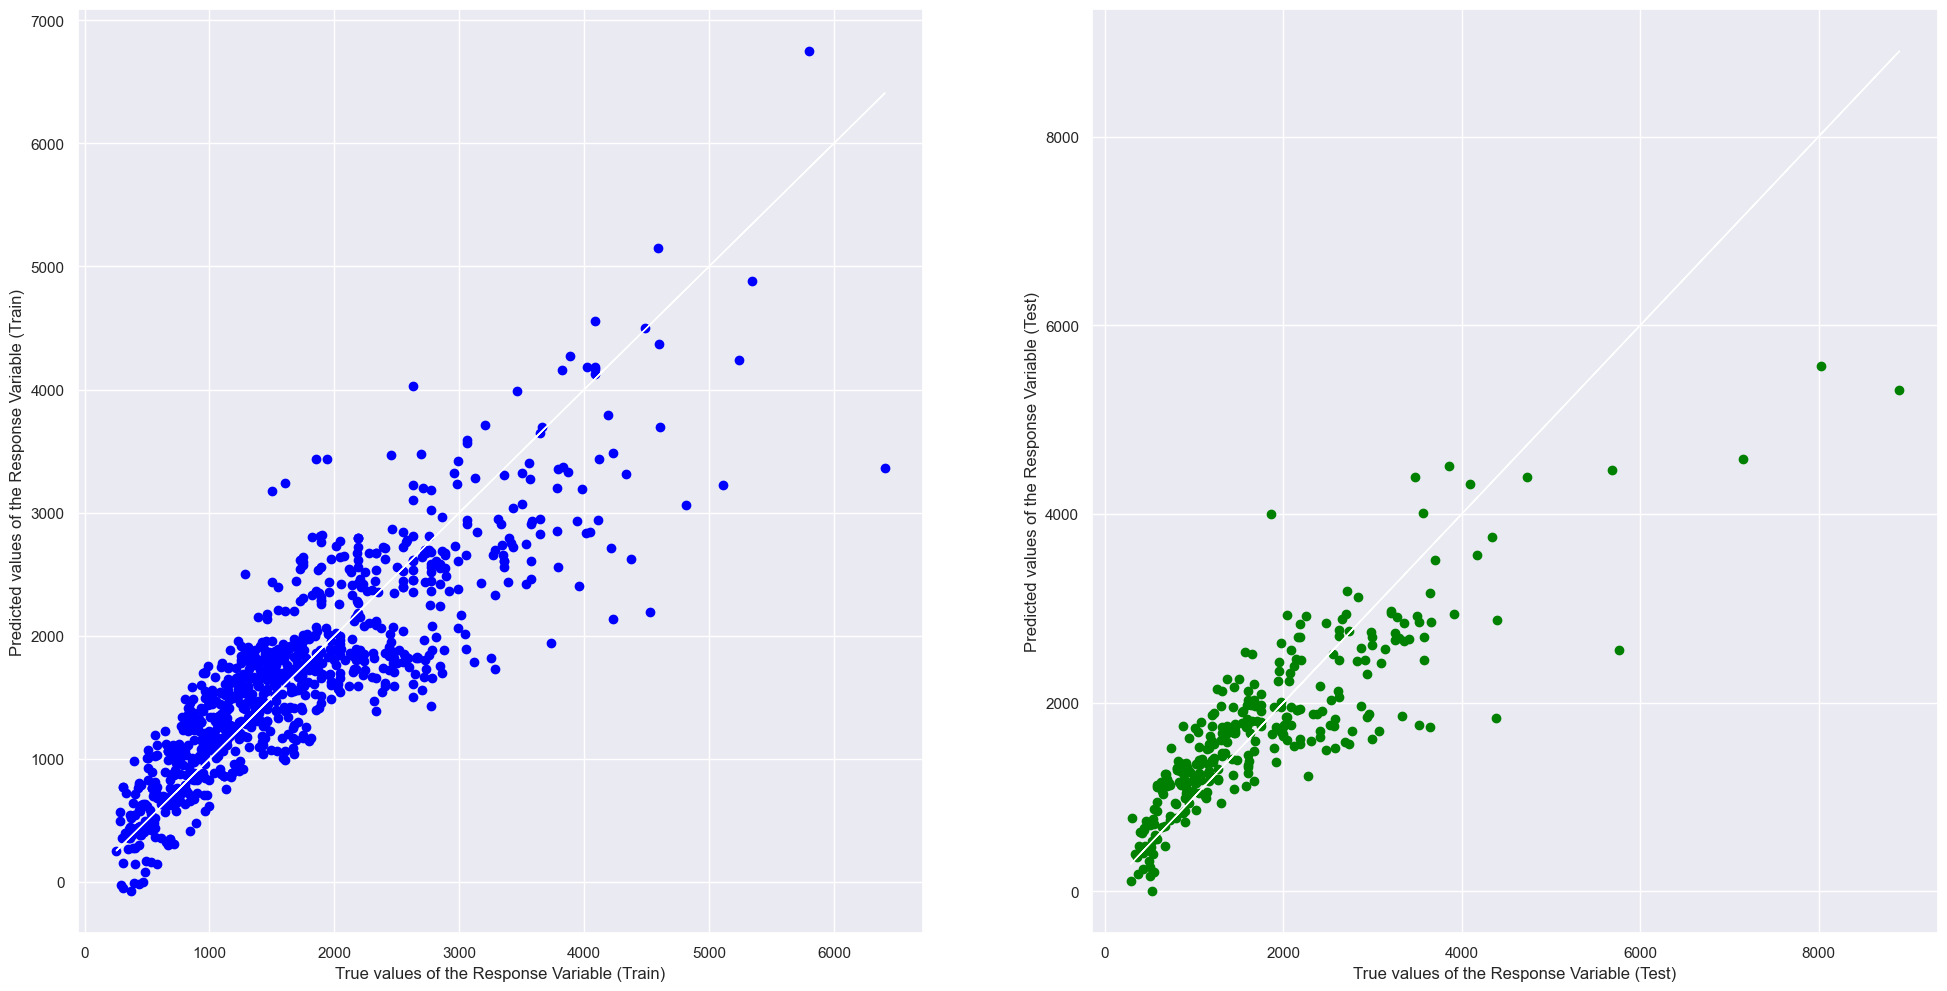

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7456667335456566
Mean Squared Error (MSE) 	: 233895.502910667
Root Mean Squared Error (RMSE) 	: 483.62744226384325

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.716789044543215
Mean Squared Error (MSE) 	: 396928.8821022894
Root Mean Squared Error (RMSE) 	: 630.0229218864099



In [43]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

#### Prediction of Price 

In [44]:
# User input specifications
user_input = {
    'Inches': 13.3,
    'Cpu': 2.3,
    'Ram': 8,
    'Memory': 128,
    'Weight': 1.37,
    'Company_Acer': 0,  # Assume the user input for other brands is 0
    'Company_Apple': 1,
    'Company_Asus': 0,
    'Company_Chuwi': 0,
    'Company_Dell': 0,
    'Company_Fujitsu': 0,
    'Company_Google': 0,
    'Company_HP': 0,
    'Company_Huawei': 0,
    'Company_LG': 0,
    'Company_Lenovo': 0,
    'Company_MSI': 0,
    'Company_Mediacom': 0,
    'Company_Microsoft': 0,
    'Company_Razer': 0,
    'Company_Samsung': 0,
    'Company_Toshiba': 0,
    'Company_Vero': 0,
    'Company_Xiaomi': 0,
    'ScreenResolution_1366x768': 0,  # Assume the user input for other resolutions is 0
    'ScreenResolution_1440x900': 0,
    'ScreenResolution_1600x900': 0,
    'ScreenResolution_1920x1080': 0,
    'ScreenResolution_1920x1200': 0,
    'ScreenResolution_2160x1440': 0,
    'ScreenResolution_2256x1504': 0,
    'ScreenResolution_2304x1440': 0,
    'ScreenResolution_2400x1600': 0,
    'ScreenResolution_2560x1440': 0,
    'ScreenResolution_2560x1600': 1,
    'ScreenResolution_2736x1824': 0,
    'ScreenResolution_2880x1800': 0,
    'ScreenResolution_3200x1800': 0,
    'ScreenResolution_3840x2160': 0,
    'Gpu_AMD': 0,  # Assume the user input for other GPUs is 0
    'Gpu_ARM': 0,
    'Gpu_Intel': 1,
    'Gpu_Nvidia': 0,
    'OpSys_Android': 0,  # Assume the user input for other operating systems is 0
    'OpSys_Chrome OS': 0,
    'OpSys_Linux': 0,
    'OpSys_Mac OS X': 0,
    'OpSys_No OS': 0,
    'OpSys_Windows 10': 0,
    'OpSys_Windows 10 S': 0,
    'OpSys_Windows 7': 0,
    'OpSys_macOS': 1,
    'TouchScreen_False': 1,  # Assume the user input for TouchScreen is 0
    'TouchScreen_True': 0,
}

# Extract the column names from the user_input dictionary
selected_features = list(user_input.keys())

# Select columns from the DataFrame using the extracted column names
X_pred = pd.DataFrame(laptop_data_ohe[selected_features])

# Predict price using the trained linear regression model
y_pred = linreg.predict(X_pred)

# Display the predicted price
print("Predicted Price (SGD):", y_pred[0])

Predicted Price (SGD): [2335.8397357]


In [45]:
# Filter the dataset based on user input specifications
filtered_laptops = laptop_data_ohe.copy()  # Make a copy to avoid modifying the original dataset
for feature, value in user_input.items():
    if feature in filtered_laptops.columns:
        filtered_laptops = filtered_laptops[filtered_laptops[feature] == value]

# Print the filtered laptops to check if any laptops match the user's specifications
print("Filtered Laptops:")
print(filtered_laptops)

# Check if any laptops match the user's specifications
if len(filtered_laptops) == 0:
    print("No laptops match the provided specifications.")
else:
    # Assume the first laptop in the filtered list is selected (you can adjust this logic)
    selected_laptop = filtered_laptops.iloc[0]
    
    # Extract the actual price of the selected laptop
    actual_price = selected_laptop["Price_SGD"]
    
    # Compute the percentage error between the actual and predicted prices
    percentage_error = 100 * abs(actual_price - y_pred[0]) / actual_price
    
    # Print the actual price and percentage error
    print("\n")
    print("Predicted Price (SGD):", y_pred[0])
    print("Actual Price (SGD) of the Selected Laptop:", actual_price)
    print("Percentage Error:", percentage_error)

Filtered Laptops:
   Inches  Cpu  Ram  Memory  Weight  Company_Acer  Company_Apple  \
0    13.3  2.3    8     128    1.37           0.0            1.0   

   Company_Asus  Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  \
0           0.0            0.0           0.0              0.0             0.0   

   Company_HP  Company_Huawei  Company_LG  Company_Lenovo  Company_MSI  \
0         0.0             0.0         0.0             0.0          0.0   

   Company_Mediacom  Company_Microsoft  Company_Razer  Company_Samsung  \
0               0.0                0.0            0.0              0.0   

   Company_Toshiba  Company_Vero  Company_Xiaomi  ScreenResolution_1366x768  \
0              0.0           0.0             0.0                        0.0   

   ScreenResolution_1440x900  ScreenResolution_1600x900  \
0                        0.0                        0.0   

   ScreenResolution_1920x1080  ScreenResolution_1920x1200  \
0                         0.0                

In [46]:
#Determining the confidence of Predictions using Train Data 
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

# Calculate confidence intervals
y_95l = actual_price - 1.96 * StdE_pred
y_95u = actual_price + 1.96 * StdE_pred
y_99l = actual_price - 2.58 * StdE_pred
y_99u = actual_price + 2.58 * StdE_pred

linear_regression_data = {
    "Actual Price": actual_price,
    "Predicted Price": y_pred[0],
    "% Error": percentage_error,
    "95 Lower": y_95l,
    "95 Upper": y_95u,
    "99 Lower": y_99l,
    "99 Upper": y_99u,
    "MSE": mean_squared_error(y_test, y_test_pred),
    "R^2": linreg.score(X_test, y_test),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
}

linear_regression_df = pd.DataFrame(linear_regression_data)

# Print the DataFrame
linear_regression_df

Mean Squared Error (MSE) 	: 233895.5
Pred Standard Error (SE) 	: 484.16


Actual Price  Predicted Price    % Error     95 Lower     95 Upper  \
0       1955.95      2335.839736  19.422262  1006.999126  2904.900874   

     99 Lower     99 Upper            MSE       R^2        RMSE  
0  706.820788  3205.079212  396928.882102  0.716789  630.022922

### Improving the Prediction accuracy in Linear Regression using Lasso Regression

In [47]:
# Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Initialize and train the Lasso regression model
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train)

# Predict using the Lasso model
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

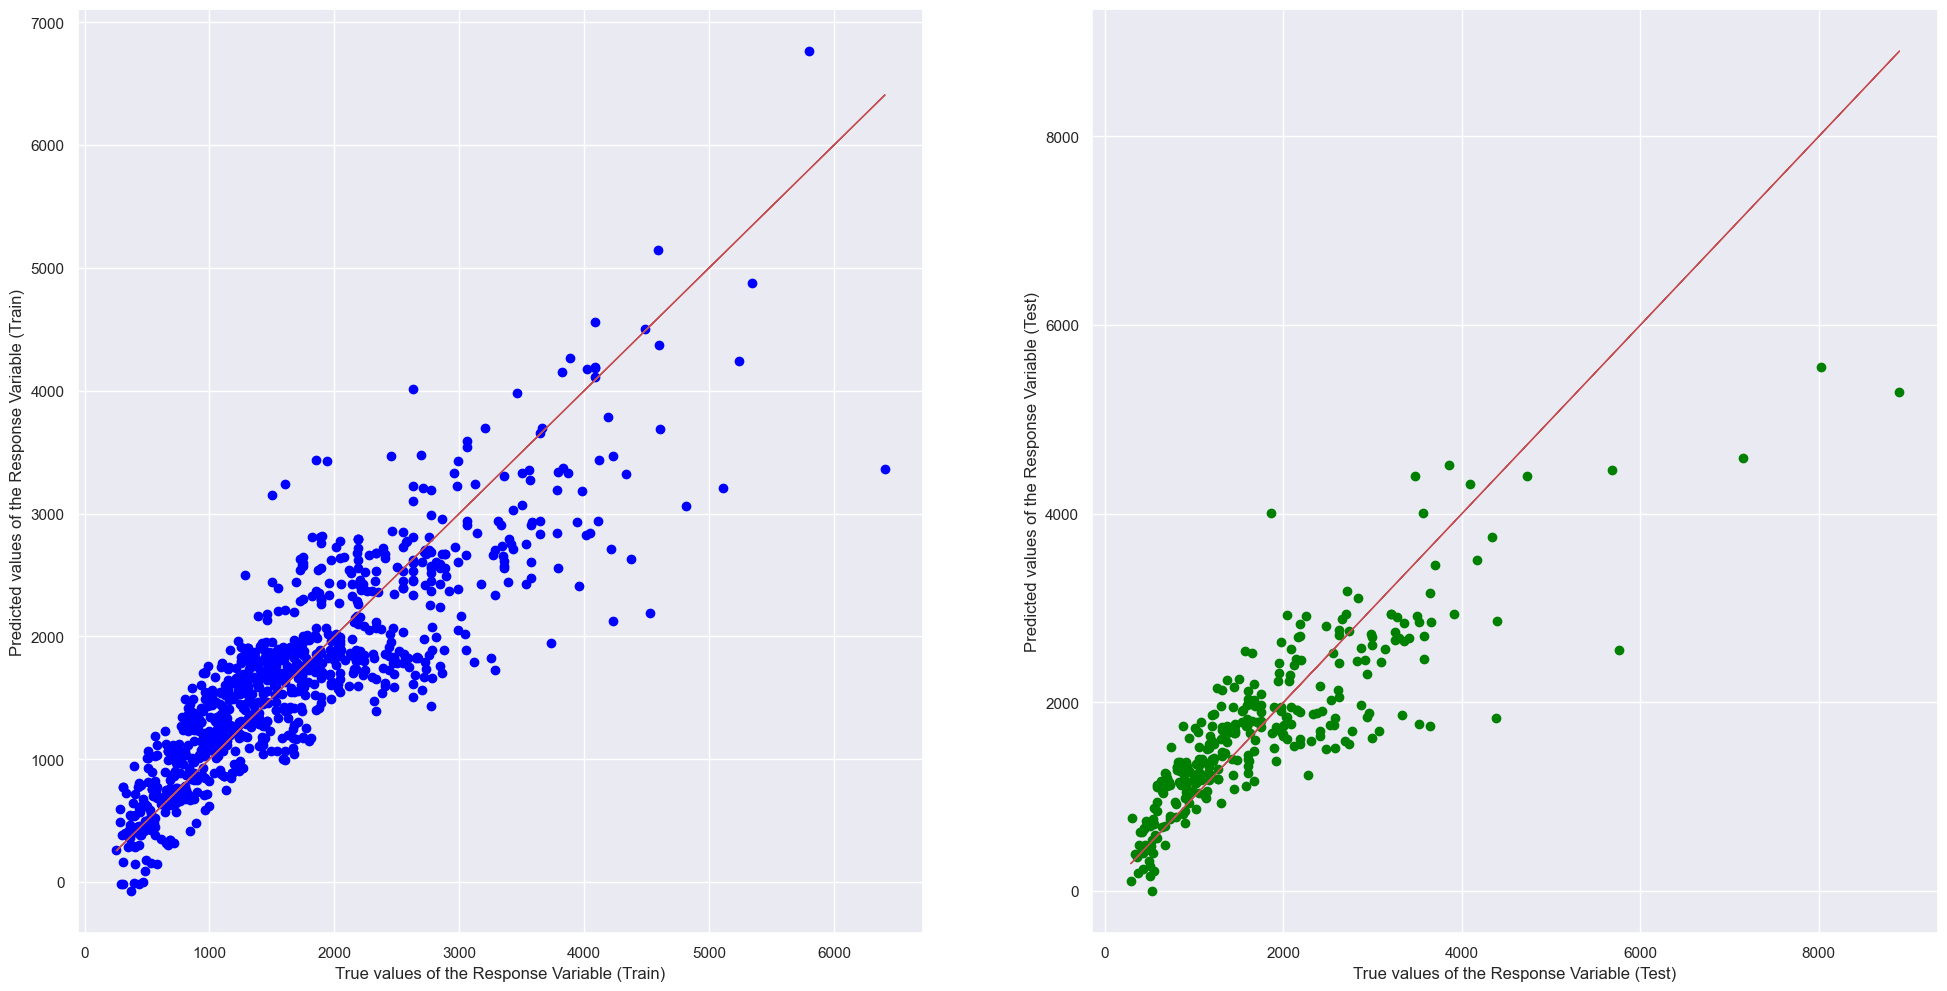

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.745555813824818
Mean Squared Error (MSE) 	: 233997.5093223721
Root Mean Squared Error (RMSE) 	: 483.73289046990806

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7161956985325821
Mean Squared Error (MSE) 	: 397760.4748220006
Root Mean Squared Error (RMSE) 	: 630.6825467872094



In [48]:
# Plotting
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_lasso, color="blue")
axes[0].plot(y_train, y_train, 'r-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_lasso, color="green")
axes[1].plot(y_test, y_test, 'r-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lasso.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_lasso))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lasso.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_lasso))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))
print()

In [49]:
# Assuming user_input is defined as per your previous code
user_input_df = pd.DataFrame([user_input])  # Convert the dictionary to a DataFrame
predicted_price_lasso = lasso.predict(user_input_df)  # Predict price using Gradient Boosting

# Calculate the error between actual and predicted price
actual_price = selected_laptop["Price_SGD"]  # Assuming the actual price is known and as provided before
percentage_error_lasso = 100 * abs(actual_price - predicted_price_lasso[0]) / actual_price

print("Predicted Price (SGD) using Lasso Regression:", predicted_price_lasso[0])
print("Actual Price (SGD):", actual_price)
print("Percentage Error using Lasso Regression:", percentage_error_lasso)

Predicted Price (SGD) using Lasso Regression: 2309.8721688651913
Actual Price (SGD): 1955.95
Percentage Error using Lasso Regression: 18.09464295432865


In [50]:
#Determining the confidence of Predictions 
MSE_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
StdE_pred_lasso = np.sqrt(len(y_train) * MSE_train_lasso/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train_lasso.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred_lasso.round(2))

# Confidence Intervals
y_95l_lasso = predicted_price_lasso[0] - 1.96 * StdE_pred_lasso
y_95u_lasso = predicted_price_lasso[0] + 1.96 * StdE_pred_lasso
y_99l_lasso = predicted_price_lasso[0] - 2.58 * StdE_pred_lasso
y_99u_lasso = predicted_price_lasso[0] + 2.58 * StdE_pred_lasso

lasso_regression_data = {
    "Actual Price": [actual_price],
    "Predicted Price": [predicted_price_lasso[0]],
    "% Error": [percentage_error_lasso],
    "95 Lower": [y_95l_lasso],
    "95 Upper": [y_95u_lasso],
    "99 Lower": [y_99l_lasso],
    "99 Upper": [y_99u_lasso],
    "MSE": mean_squared_error(y_test, y_test_pred_lasso),
    "R^2": lasso.score(X_test, y_test),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)),
}

lasso_regression_df = pd.DataFrame(lasso_regression_data)

lasso_regression_df

Mean Squared Error (MSE) 	: 233997.51
Pred Standard Error (SE) 	: 484.26


Actual Price  Predicted Price    % Error     95 Lower     95 Upper  \
0       1955.95      2309.872169  18.094643  1360.714389  3259.029949   

      99 Lower     99 Upper            MSE       R^2        RMSE  
0  1060.470602  3559.273736  397760.474822  0.716196  630.682547

### Alternative Models for Prediction of Laptop Price

### 1. Gradient Boosting Regression

In [51]:
# Initialize and fit the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train.values.ravel())  

# Predict the responses for both training and test sets
y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

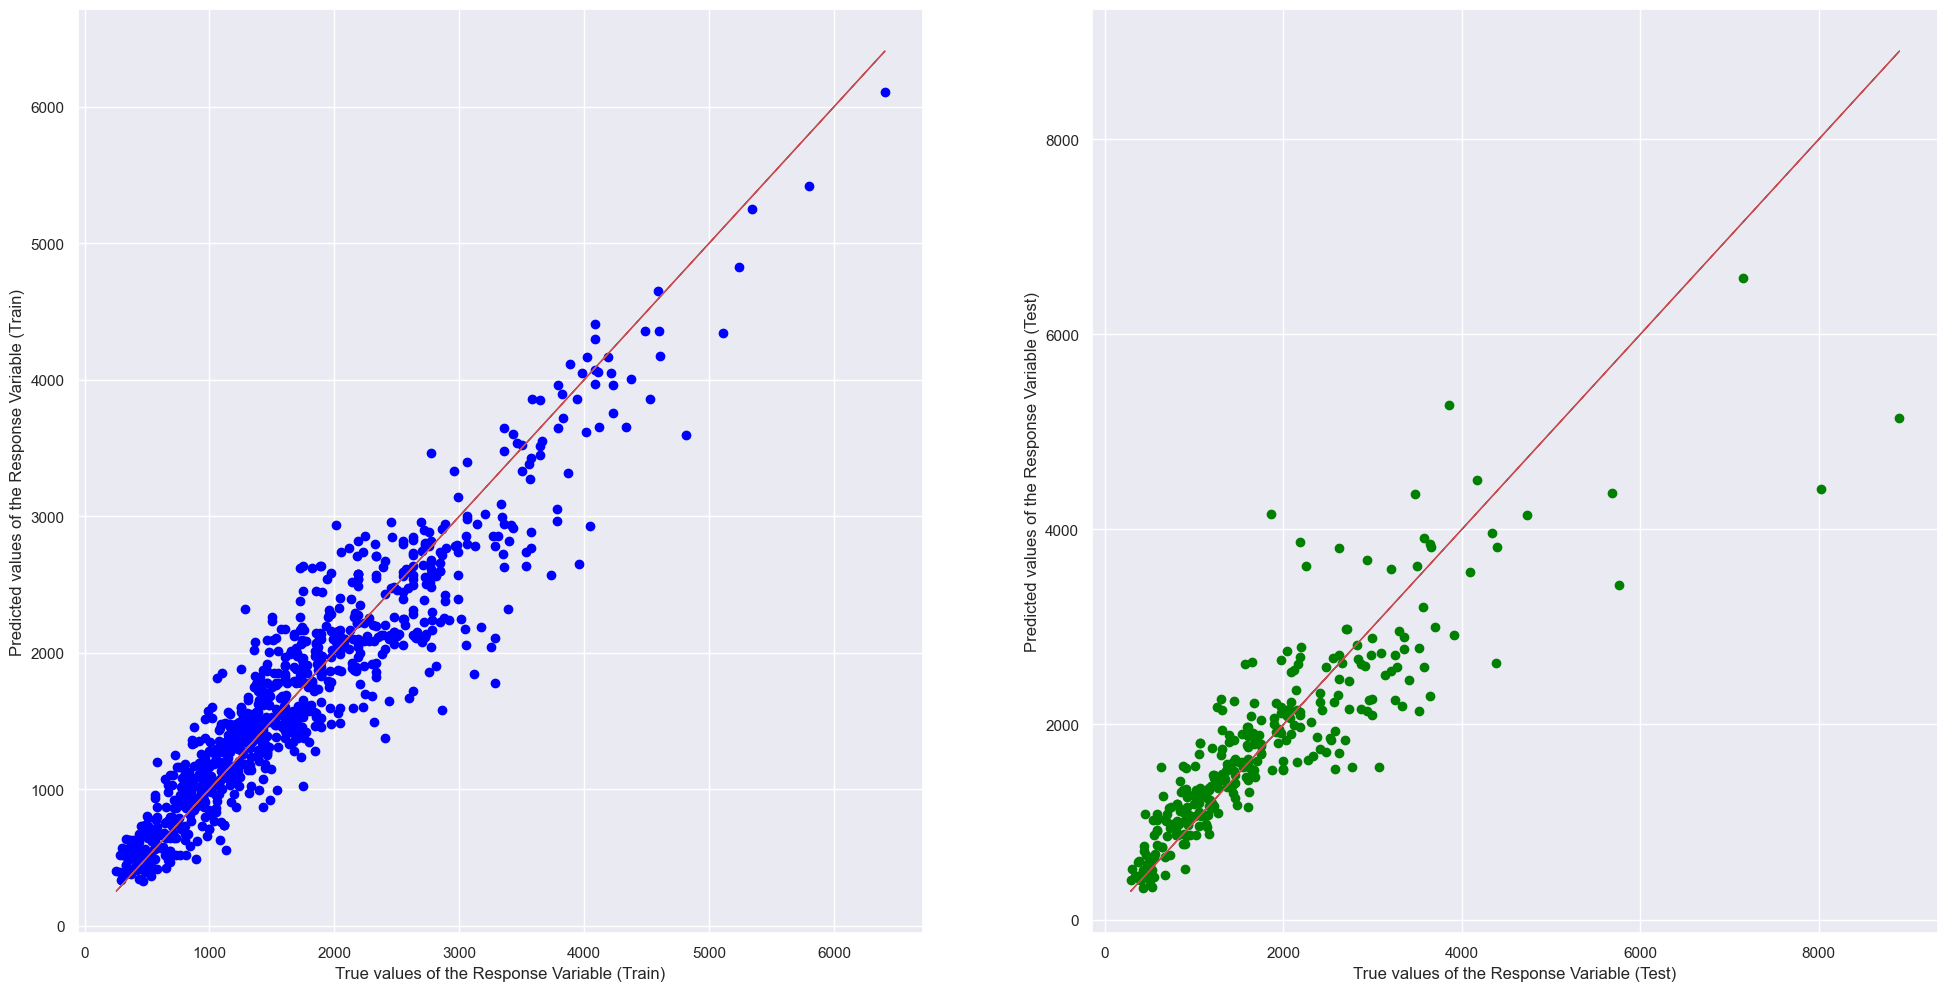

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8808627685801075
Mean Squared Error (MSE) 	: 109563.5779259831
Root Mean Squared Error (RMSE) 	: 331.00389412510407

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7576485112568716
Mean Squared Error (MSE) 	: 339663.0802910943
Root Mean Squared Error (RMSE) 	: 582.8062116099093



In [52]:
# Plotting
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_gbr, color="blue")
axes[0].plot(y_train, y_train, 'r-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_gbr, color="green")
axes[1].plot(y_test, y_test, 'r-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_gbr))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred_gbr)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_gbr))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred_gbr)))
print()

In [53]:
# Assuming user_input is defined as per your previous code
user_input_df = pd.DataFrame([user_input])  # Convert the dictionary to a DataFrame
predicted_price_gbr = gbr.predict(user_input_df)  # Predict price using Gradient Boosting

# Calculate the error between actual and predicted price
actual_price = selected_laptop["Price_SGD"]  # Assuming the actual price is known and as provided before
percentage_error_gbr = 100 * abs(actual_price - predicted_price_gbr[0]) / actual_price

print("Predicted Price (SGD) using Gradient Boosting:", predicted_price_gbr[0])
print("Actual Price (SGD):", actual_price)
print("Percentage Error using Gradient Boosting:", percentage_error_gbr)

Predicted Price (SGD) using Gradient Boosting: 1948.6369589267597
Actual Price (SGD): 1955.95
Percentage Error using Gradient Boosting: 0.3738869129190601


In [54]:
#Determining the confidence of Predictions 
MSE_train_gbr = mean_squared_error(y_train, y_train_pred_gbr)
StdE_pred_gbr = np.sqrt(len(y_train) * MSE_train_gbr/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train_gbr.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred_gbr.round(2))

# Confidence Intervals
y_95l_gbr = predicted_price_gbr[0] - 1.96 * StdE_pred_gbr
y_95u_gbr = predicted_price_gbr[0] + 1.96 * StdE_pred_gbr
y_99l_gbr = predicted_price_gbr[0] - 2.58 * StdE_pred_gbr
y_99u_gbr = predicted_price_gbr[0] + 2.58 * StdE_pred_gbr

gradient_boosting_regression_data = {
    "Actual Price": [actual_price],
    "Predicted Price": [predicted_price_gbr[0]],
    "% Error": [percentage_error_gbr],
    "95 Lower": [y_95l_gbr],
    "95 Upper": [y_95u_gbr],
    "99 Lower": [y_99l_gbr],
    "99 Upper": [y_99u_gbr],
    "MSE": mean_squared_error(y_test, y_test_pred_gbr),
    "R^2": gbr.score(X_test, y_test),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_gbr)),
}

gradient_boosting_regression_df = pd.DataFrame(gradient_boosting_regression_data)
gradient_boosting_regression_df 

Mean Squared Error (MSE) 	: 109563.58
Pred Standard Error (SE) 	: 331.37


Actual Price  Predicted Price   % Error     95 Lower     95 Upper  \
0       1955.95      1948.636959  0.373887  1299.156786  2598.117132   

      99 Lower     99 Upper            MSE       R^2        RMSE  
0  1093.708977  2803.564941  339663.080291  0.757649  582.806212

### 2. Random Forest

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


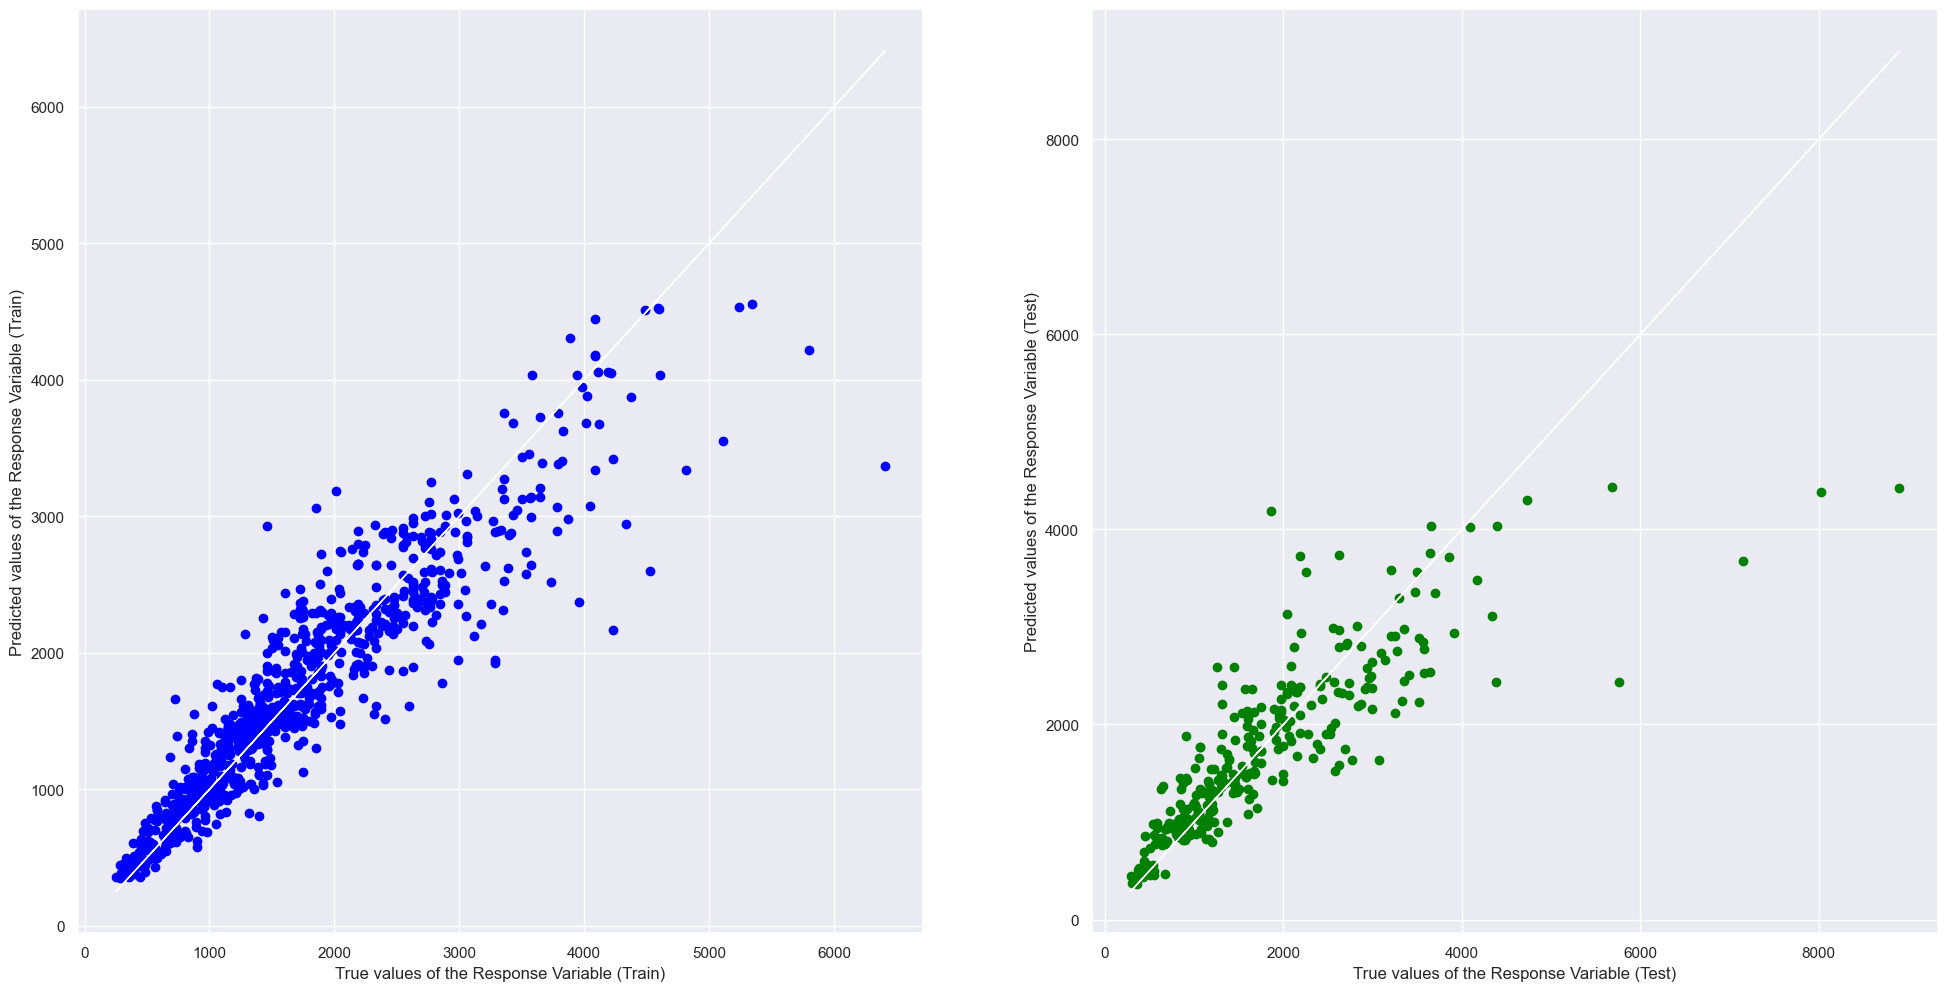

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8611577463016726
Mean Squared Error (MSE) 	: 127685.14007918959
Root Mean Squared Error (RMSE) 	: 357.3305753489191

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7065071971355441
Mean Squared Error (MSE) 	: 411339.2081113616
Root Mean Squared Error (RMSE) 	: 641.3573170326831



In [55]:
# Defining Random Forest Regressor with a random state for reproducibility
RF = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define the parameter grid
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RF,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="neg_mean_squared_error")

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best model found by grid search
RF_best = grid_search.best_estimator_

# Predicting Models using Train and Test data 
y_train_pred_RF = RF_best.predict(X_train)
y_test_pred_RF = RF_best.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_RF, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_RF, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred_RF))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_RF))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred_RF)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred_RF))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_RF))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred_RF)))
print()

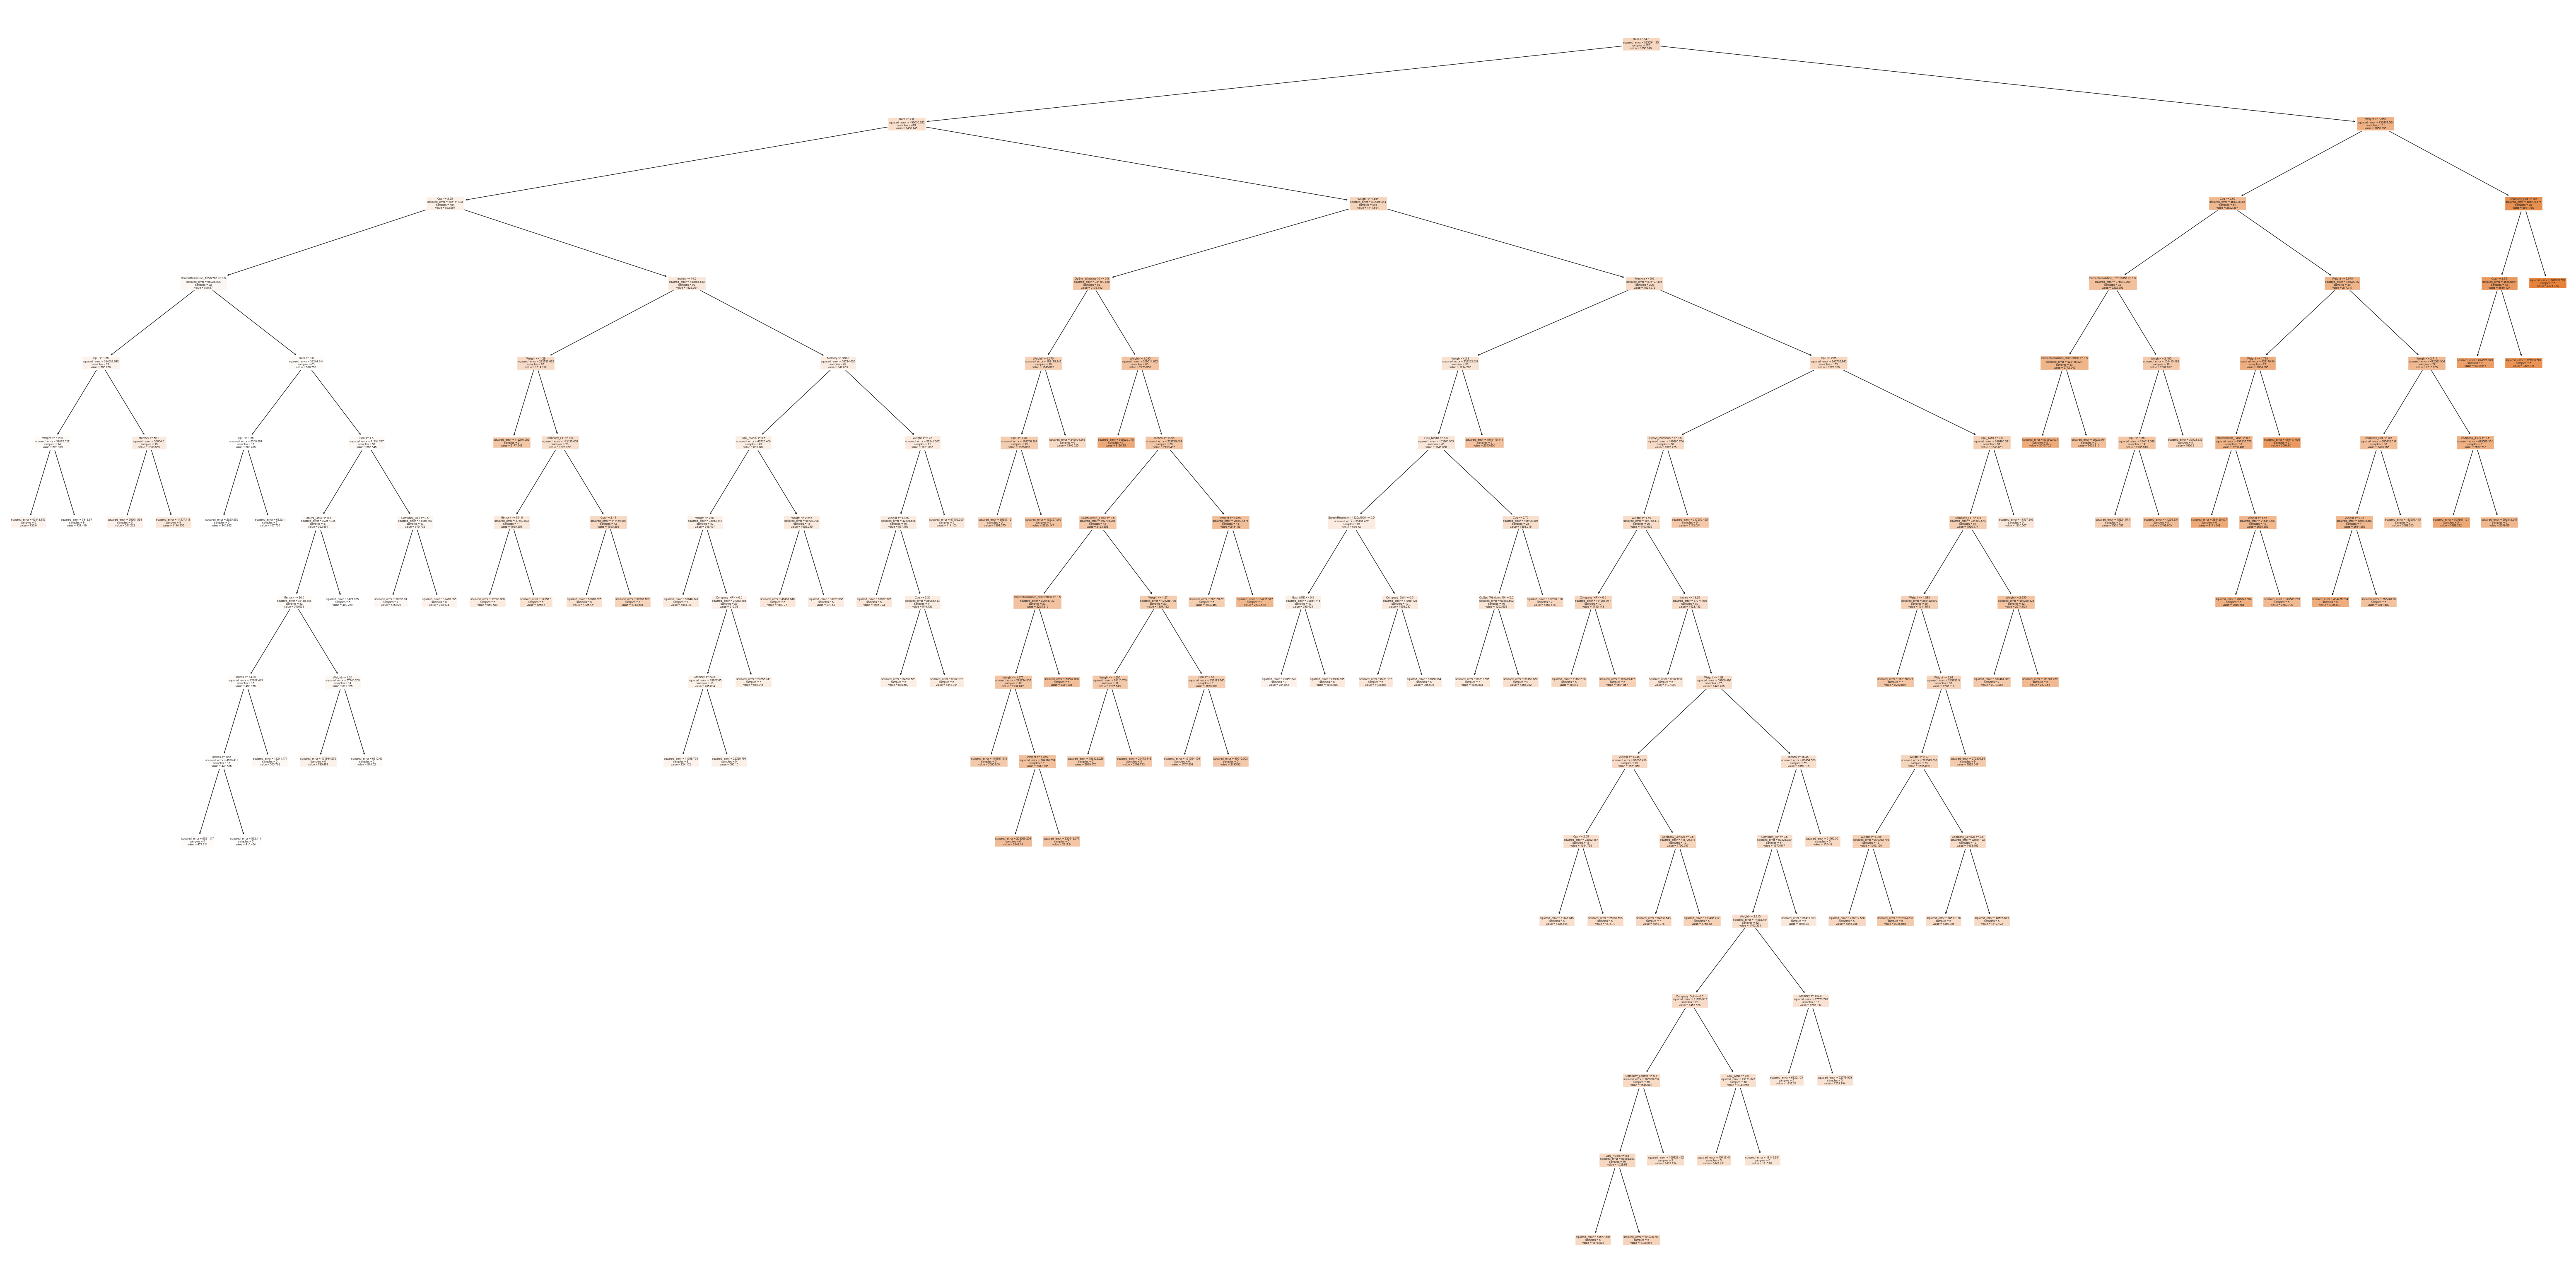

In [56]:
plt.figure(figsize=(80, 40))  # Adjust the size as needed
plot_tree(RF_best.estimators_[5], feature_names=X_train.columns.tolist(), filled=True)  # Convert columns to list
plt.show()

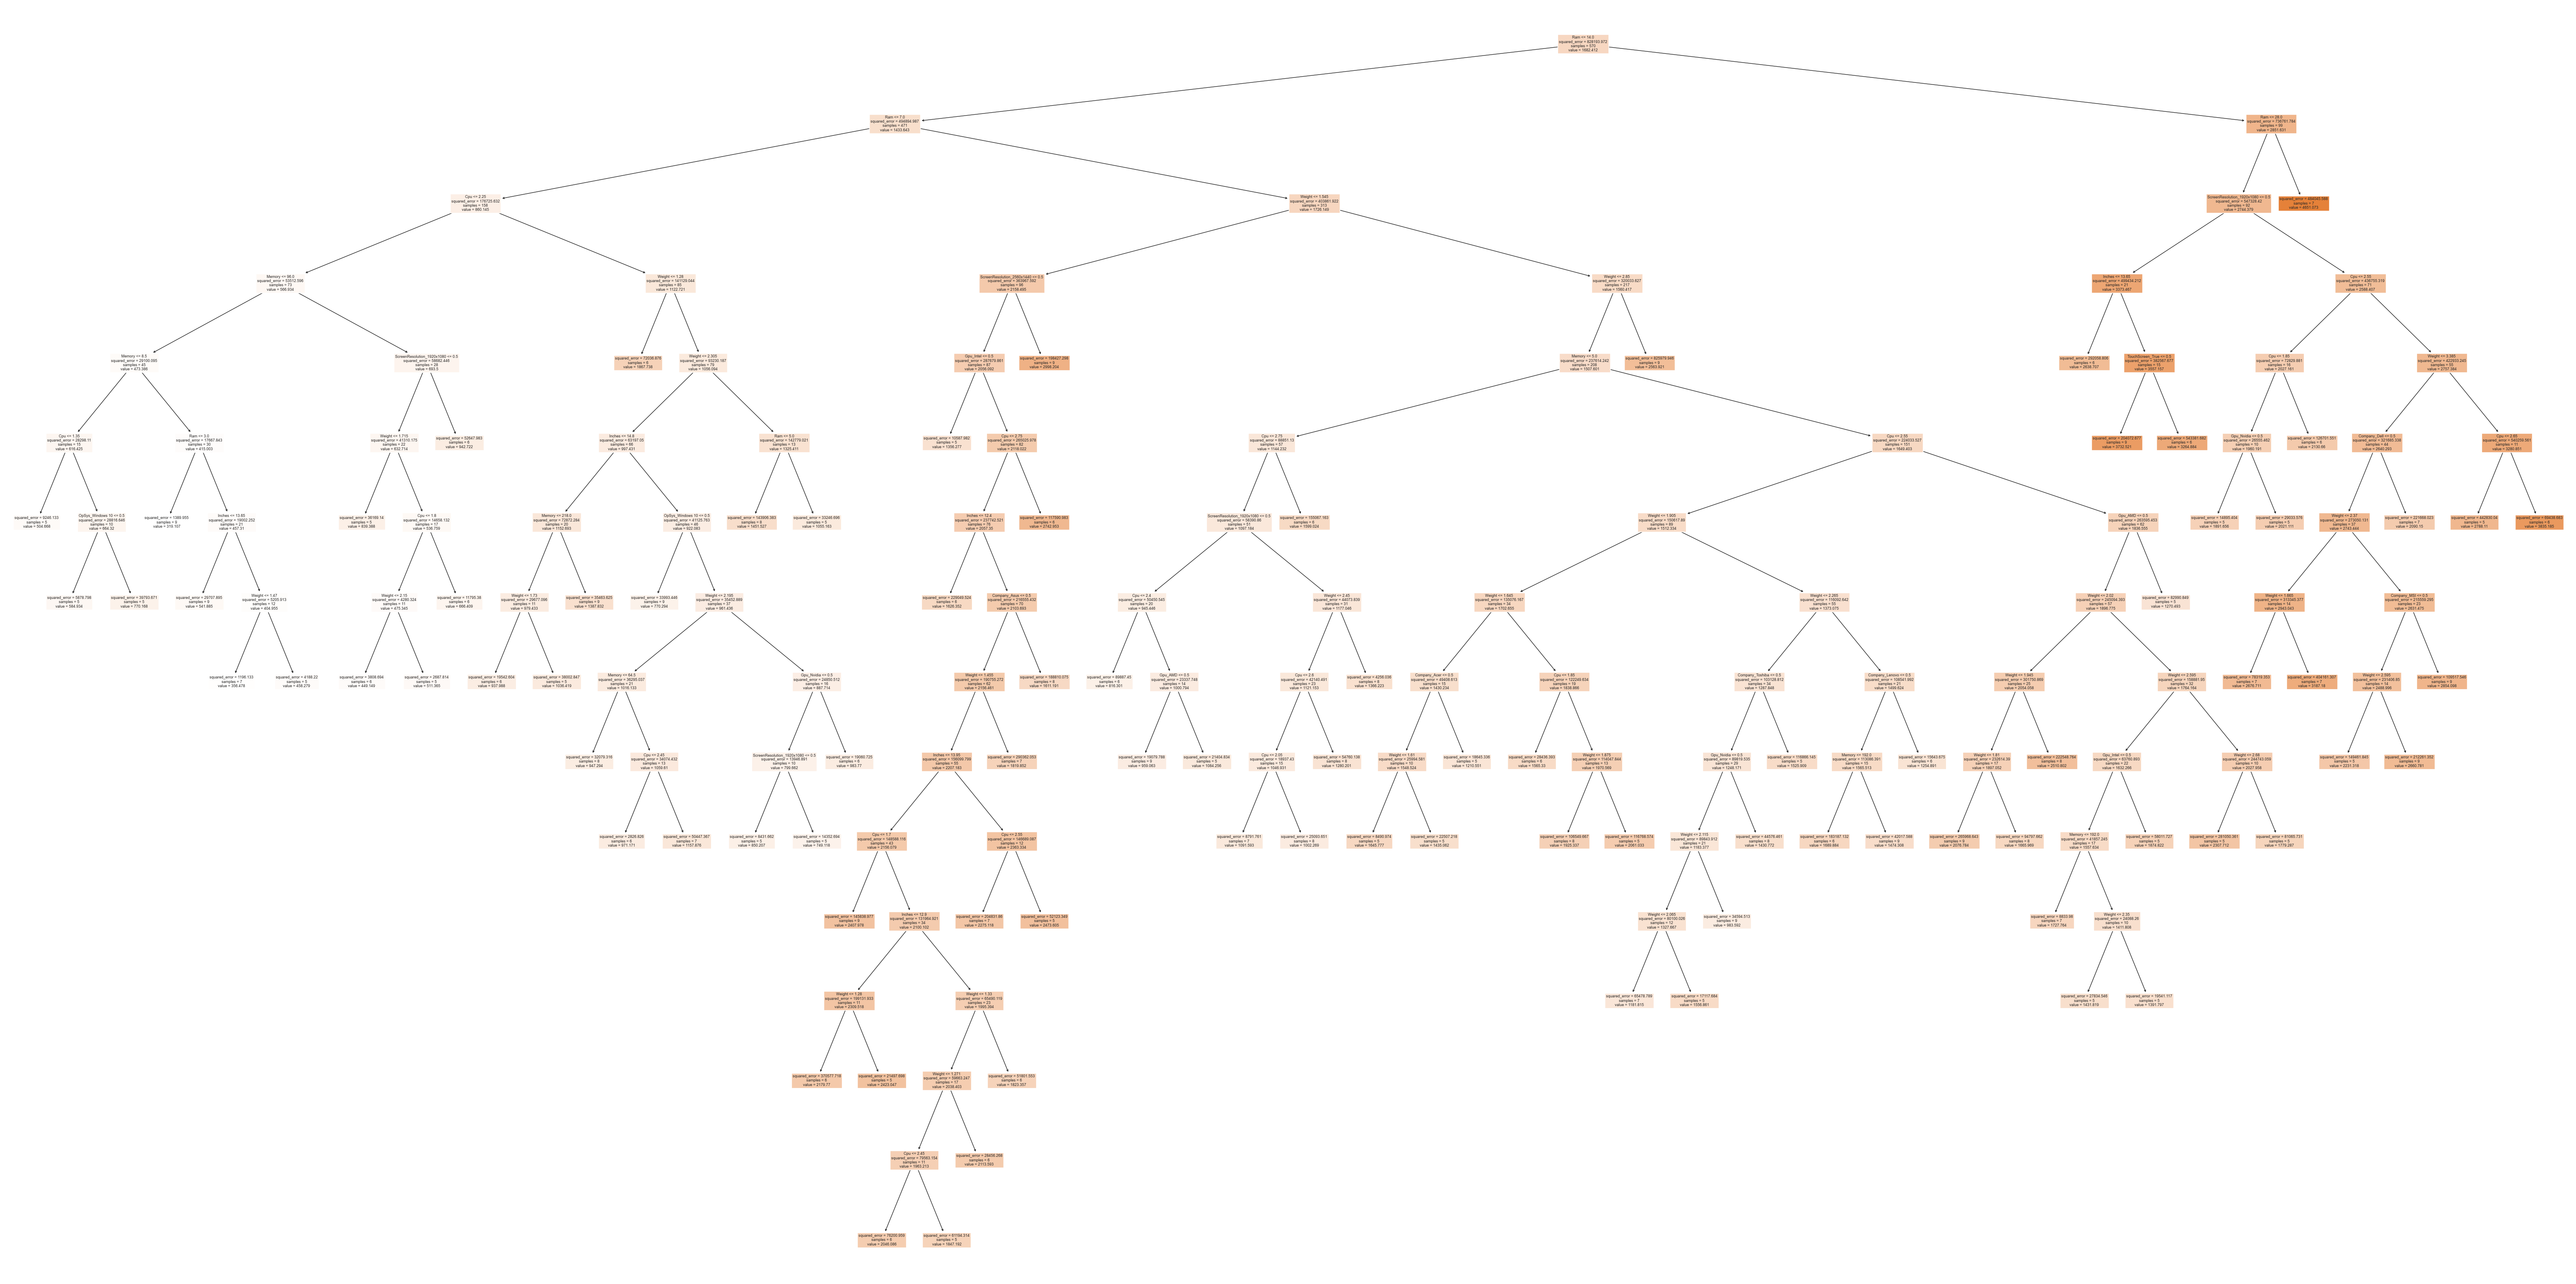

In [57]:
plt.figure(figsize=(80, 40))
plot_tree(RF_best.estimators_[7], feature_names=X_train.columns.tolist(), filled=True)  # Convert columns to list
plt.show()

In [58]:
feature_importances = RF_best.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importance values
imp_df = pd.DataFrame({
    "Varname": X_train.columns,  # Feature names
    "Imp": feature_importances   # Importance scores
})

# Sort the DataFrame by importance in descending order
sorted_imp_df = imp_df.sort_values(by="Imp", ascending=False)

# Display the sorted DataFrame
sorted_imp_df

Varname           Imp
2                          Ram  6.396685e-01
4                       Weight  1.598696e-01
1                          Cpu  8.049775e-02
3                       Memory  3.060761e-02
0                       Inches  1.923739e-02
27  ScreenResolution_1920x1080  1.100135e-02
50             OpSys_Windows 7  1.037282e-02
33  ScreenResolution_2560x1440  7.492693e-03
9                 Company_Dell  4.916230e-03
7                 Company_Asus  4.632190e-03
48            OpSys_Windows 10  4.366111e-03
12                  Company_HP  4.190189e-03
42                  Gpu_Nvidia  3.636847e-03
24   ScreenResolution_1366x768  3.179914e-03
15              Company_Lenovo  3.034900e-03
41                   Gpu_Intel  3.032884e-03
38  ScreenResolution_3840x2160  2.303393e-03
52           TouchScreen_False  1.676366e-03
53            TouchScreen_True  1.506733e-03
5                 Company_Acer  1.066485e-03
39                     Gpu_AMD  9.962709e-04
16                 Company_MSI  9.792307e-04
47                 OpSys_No OS  7.497415e-04
37  ScreenResolution_3200x1800  3.591873e-04
21             Company_Toshiba  2.184327e-04
6                Company_Apple  1.764881e-04
45                 OpSys_Linux  1.227992e-04
46              OpSys_Mac OS X  6.113533e-05
17            Company_Mediacom  2.784318e-05
44             OpSys_Chrome OS  1.869347e-05
26   ScreenResolution_1600x900  2.041365e-07
25   ScreenResolution_1440x900  0.000000e+00
8                Company_Chuwi  0.000000e+00
51                 OpSys_macOS  0.000000e+00
10             Company_Fujitsu  0.000000e+00
49          OpSys_Windows 10 S  0.000000e+00
11              Company_Google  0.000000e+00
13              Company_Huawei  0.000000e+00
43               OpSys_Android  0.000000e+00
14                  Company_LG  0.000000e+00
40                     Gpu_ARM  0.000000e+00
18           Company_Microsoft  0.000000e+00
19               Company_Razer  0.000000e+00
20             Company_Samsung  0.000000e+00
36  ScreenResolution_2880x1800  0.000000e+00
35  ScreenResolution_2736x1824  0.000000e+00
34  ScreenResolution_2560x1600  0.000000e+00
22                Company_Vero  0.000000e+00
32  ScreenResolution_2400x1600  0.000000e+00
31  ScreenResolution_2304x1440  0.000000e+00
23              Company_Xiaomi  0.000000e+00
29  ScreenResolution_2160x1440  0.000000e+00
28  ScreenResolution_1920x1200  0.000000e+00
30  ScreenResolution_2256x1504  0.000000e+00

In [59]:
# Convert user input into a DataFrame to match the training data format
input_df = pd.DataFrame([user_input])

# Predict price using the trained random forest model
predicted_price_RF = RF_best.predict(input_df)

# Check if any laptops match the user's specifications
if len(filtered_laptops) == 0:
    print("No laptops match the provided specifications.")
else:
    # Assume the first laptop in the filtered list is selected (you can adjust this logic)
    selected_laptop = filtered_laptops.iloc[0]
    
    # Extract the actual price of the selected laptop
    actual_price = selected_laptop["Price_SGD"]
    
    # Compute the percentage error between the actual and predicted prices
    percentage_error_RF = 100 * abs(actual_price - predicted_price_RF[0]) / actual_price
    
    # Print the actual price and percentage error
    print("Predicted Price (SGD):", predicted_price_RF[0])
    print("Actual Price (SGD) of the Selected Laptop:", actual_price)
    print("Percentage Error:", percentage_error_RF)

Predicted Price (SGD): 2063.8960035098576
Actual Price (SGD) of the Selected Laptop: 1955.95
Percentage Error: 5.518852910854444


In [60]:
# Calculate Mean Squared Error on training data
MSE_train_RF = mean_squared_error(y_train, y_train_pred_RF)
StdE_pred_RF = np.sqrt(len(y_train) * MSE_train_RF / (len(y_train) - 2))

# Print the MSE and the Standard Error of the prediction
print("Mean Squared Error (MSE) \t:", MSE_train_RF.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred_RF.round(2))

# Calculate confidence intervals
y_95l_RF = actual_price - 1.96 * StdE_pred_RF
y_95u_RF = actual_price + 1.96 * StdE_pred_RF
y_99l_RF = actual_price - 2.58 * StdE_pred_RF
y_99u_RF = actual_price + 2.58 * StdE_pred_RF

random_forest_data = {
    "Actual Price": [actual_price],
    "Predicted Price": [predicted_price_RF[0]],
    "% Error": percentage_error_RF,
    "95 Lower": [y_95l_RF],
    "95 Upper": [y_95u_RF],
    "99 Lower": [y_99l_RF],
    "99 Upper": [y_99u_RF],
    "MSE": mean_squared_error(y_test, y_test_pred_RF),
    "R^2": r2_score(y_test, y_test_pred_RF),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_RF)),
}

random_forest_df = pd.DataFrame(random_forest_data)
random_forest_df

Mean Squared Error (MSE) 	: 127685.14
Pred Standard Error (SE) 	: 357.72


Actual Price  Predicted Price   % Error    95 Lower    95 Upper  \
0       1955.95      2063.896004  5.518853  1254.81286  2657.08714   

      99 Lower     99 Upper            MSE       R^2        RMSE  
0  1033.024581  2878.875419  411339.208111  0.706507  641.357317

## Evaluation of the Machine Learning Models Implemented 

In [61]:
Comparison_Of_Models = pd.concat([linear_regression_df, lasso_regression_df, 
                                   gradient_boosting_regression_df, random_forest_df], 
                                  keys=['Linear Regression', 'Lasso Regression', 
                                        'Gradient Boosting Regression', 'Random Forest'])

Comparison_Of_Models

Actual Price  Predicted Price    % Error  \
Linear Regression            0       1955.95      2335.839736  19.422262   
Lasso Regression             0       1955.95      2309.872169  18.094643   
Gradient Boosting Regression 0       1955.95      1948.636959   0.373887   
Random Forest                0       1955.95      2063.896004   5.518853   

                                   95 Lower     95 Upper     99 Lower  \
Linear Regression            0  1006.999126  2904.900874   706.820788   
Lasso Regression             0  1360.714389  3259.029949  1060.470602   
Gradient Boosting Regression 0  1299.156786  2598.117132  1093.708977   
Random Forest                0  1254.812860  2657.087140  1033.024581   

                                   99 Upper            MSE       R^2  \
Linear Regression            0  3205.079212  396928.882102  0.716789   
Lasso Regression             0  3559.273736  397760.474822  0.716196   
Gradient Boosting Regression 0  2803.564941  339663.080291  0.757649   
Random Forest                0  2878.875419  411339.208111  0.706507   

                                      RMSE  
Linear Regression            0  630.022922  
Lasso Regression             0  630.682547  
Gradient Boosting Regression 0  582.806212  
Random Forest                0  641.357317

Gradient Boosting Regression Model is the best out of all the models as it has the lowest MSE, highest R^2 and lowest RMSE values. Having a lower MSE and RSME indicates predictions made by model is closer to the actual values of model on average. It's higher R^2 value further tells us it explains more of the variance in the target variable.

Though percentage error tells us the margin of error, we will not consider it when deciding the best model as it's value fluctuates with every prediction. 

## Removing Outliers in Dataset 
Test to see if it improves accuracy of Gradient Boosting Regression Model

In [62]:
# Calculate Q1, Q3, and IQR for Price_SGD
Q1_Price_SGD = laptop_data_ohe['Price_SGD'].quantile(0.25)
Q3_Price_SGD = laptop_data_ohe['Price_SGD'].quantile(0.75)
IQR_Price_SGD = Q3_Price_SGD - Q1_Price_SGD

# Calculate lower bound and upper bound for Price_SGD
lower_bound_Price_SGD = Q1_Price_SGD - 1.5 * IQR_Price_SGD
upper_bound_Price_SGD = Q3_Price_SGD + 1.5 * IQR_Price_SGD

# Identify outliers for Price_SGD
Price_SGD_outliers = laptop_data_ohe[(laptop_data_ohe['Price_SGD'] < lower_bound_Price_SGD) | (laptop_data_ohe['Price_SGD'] > upper_bound_Price_SGD)]
outlier_indices = Price_SGD_outliers.index

# Remove Outliers from data 
laptop_cleaned = laptop_data_ohe.drop(outlier_indices)
laptop_cleaned

Inches  Cpu  Ram  Memory  Weight  Company_Acer  Company_Apple  \
0       13.3  2.3    8     128    1.37           0.0            1.0   
1       13.3  1.8    8     128    1.34           0.0            1.0   
2       15.6  2.5    8     256    1.86           0.0            0.0   
3       15.4  2.7   16     512    1.83           0.0            1.0   
4       13.3  3.1    8     256    1.37           0.0            1.0   
...      ...  ...  ...     ...     ...           ...            ...   
1212    14.0  2.5    4     128    1.80           0.0            0.0   
1213    13.3  2.5   16     512    1.30           0.0            0.0   
1214    14.0  1.6    2      64    1.50           0.0            0.0   
1215    15.6  2.5    6       1    2.19           0.0            0.0   
1216    15.6  1.6    4     500    2.20           0.0            0.0   

      Company_Asus  Company_Chuwi  Company_Dell  Company_Fujitsu  \
0              0.0            0.0           0.0              0.0   
1              0.0            0.0           0.0              0.0   
2              0.0            0.0           0.0              0.0   
3              0.0            0.0           0.0              0.0   
4              0.0            0.0           0.0              0.0   
...            ...            ...           ...              ...   
1212           0.0            0.0           0.0              0.0   
1213           0.0            0.0           0.0              0.0   
1214           0.0            0.0           0.0              0.0   
1215           0.0            0.0           0.0              0.0   
1216           1.0            0.0           0.0              0.0   

      Company_Google  Company_HP  Company_Huawei  Company_LG  Company_Lenovo  \
0                0.0         0.0             0.0         0.0             0.0   
1                0.0         0.0             0.0         0.0             0.0   
2                0.0         1.0             0.0         0.0             0.0   
3                0.0         0.0             0.0         0.0             0.0   
4                0.0         0.0             0.0         0.0             0.0   
...              ...         ...             ...         ...             ...   
1212             0.0         0.0             0.0         0.0             1.0   
1213             0.0         0.0             0.0         0.0             1.0   
1214             0.0         0.0             0.0         0.0             1.0   
1215             0.0         1.0             0.0         0.0             0.0   
1216             0.0         0.0             0.0         0.0             0.0   

      Company_MSI  Company_Mediacom  Company_Microsoft  Company_Razer  \
0             0.0               0.0                0.0            0.0   
1             0.0               0.0                0.0            0.0   
2             0.0               0.0                0.0            0.0   
3             0.0               0.0                0.0            0.0   
4             0.0               0.0                0.0            0.0   
...           ...               ...                ...            ...   
1212          0.0               0.0                0.0            0.0   
1213          0.0               0.0                0.0            0.0   
1214          0.0               0.0                0.0            0.0   
1215          0.0               0.0                0.0            0.0   
1216          0.0               0.0                0.0            0.0   

      Company_Samsung  Company_Toshiba  Company_Vero  Company_Xiaomi  \
0                 0.0              0.0           0.0             0.0   
1                 0.0              0.0           0.0             0.0   
2                 0.0              0.0           0.0             0.0   
3                 0.0              0.0           0.0             0.0   
4                 0.0              0.0           0.0             0.0   
...               ...              ...           ...             .

In [63]:
print("Shape of DataFrame before removing Outliers:", laptop_data_ohe.shape)
print("Shape of DataFrame after removing Outliers:", laptop_cleaned.shape)

Shape of DataFrame before removing Outliers: (1217, 55)
Shape of DataFrame after removing Outliers: (1182, 55)


In [64]:
# Extract Response and Predictors
predictors = ['Inches', 'Cpu', 'Ram', 'Memory', 'Weight', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'ScreenResolution_1366x768', 'ScreenResolution_1440x900', 'ScreenResolution_1600x900', 'ScreenResolution_1920x1080', 'ScreenResolution_1920x1200', 'ScreenResolution_2160x1440', 'ScreenResolution_2256x1504', 'ScreenResolution_2304x1440', 'ScreenResolution_2400x1600', 'ScreenResolution_2560x1440', 'ScreenResolution_2560x1600', 'ScreenResolution_2736x1824', 'ScreenResolution_2880x1800', 'ScreenResolution_3200x1800', 'ScreenResolution_3840x2160', 'Gpu_AMD', 'Gpu_ARM', 'Gpu_Intel', 'Gpu_Nvidia', 'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'TouchScreen_False', 'TouchScreen_True']
y_new = pd.DataFrame(laptop_cleaned["Price_SGD"])
X_new = pd.DataFrame(laptop_cleaned[predictors])

In [65]:
# Split the Dataset into Train and Test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train_new.shape, X_train_new.shape)
print("Test Set  :", y_test_new.shape, X_test_new.shape)

Train Set : (886, 1) (886, 54)
Test Set  : (296, 1) (296, 54)


In [66]:
# Initialize and fit the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train_new, y_train_new.values.ravel())  

# Predict the responses for both training and test sets
y_train_pred_gbr_new = gbr.predict(X_train_new)
y_test_pred_gbr_new = gbr.predict(X_test_new)

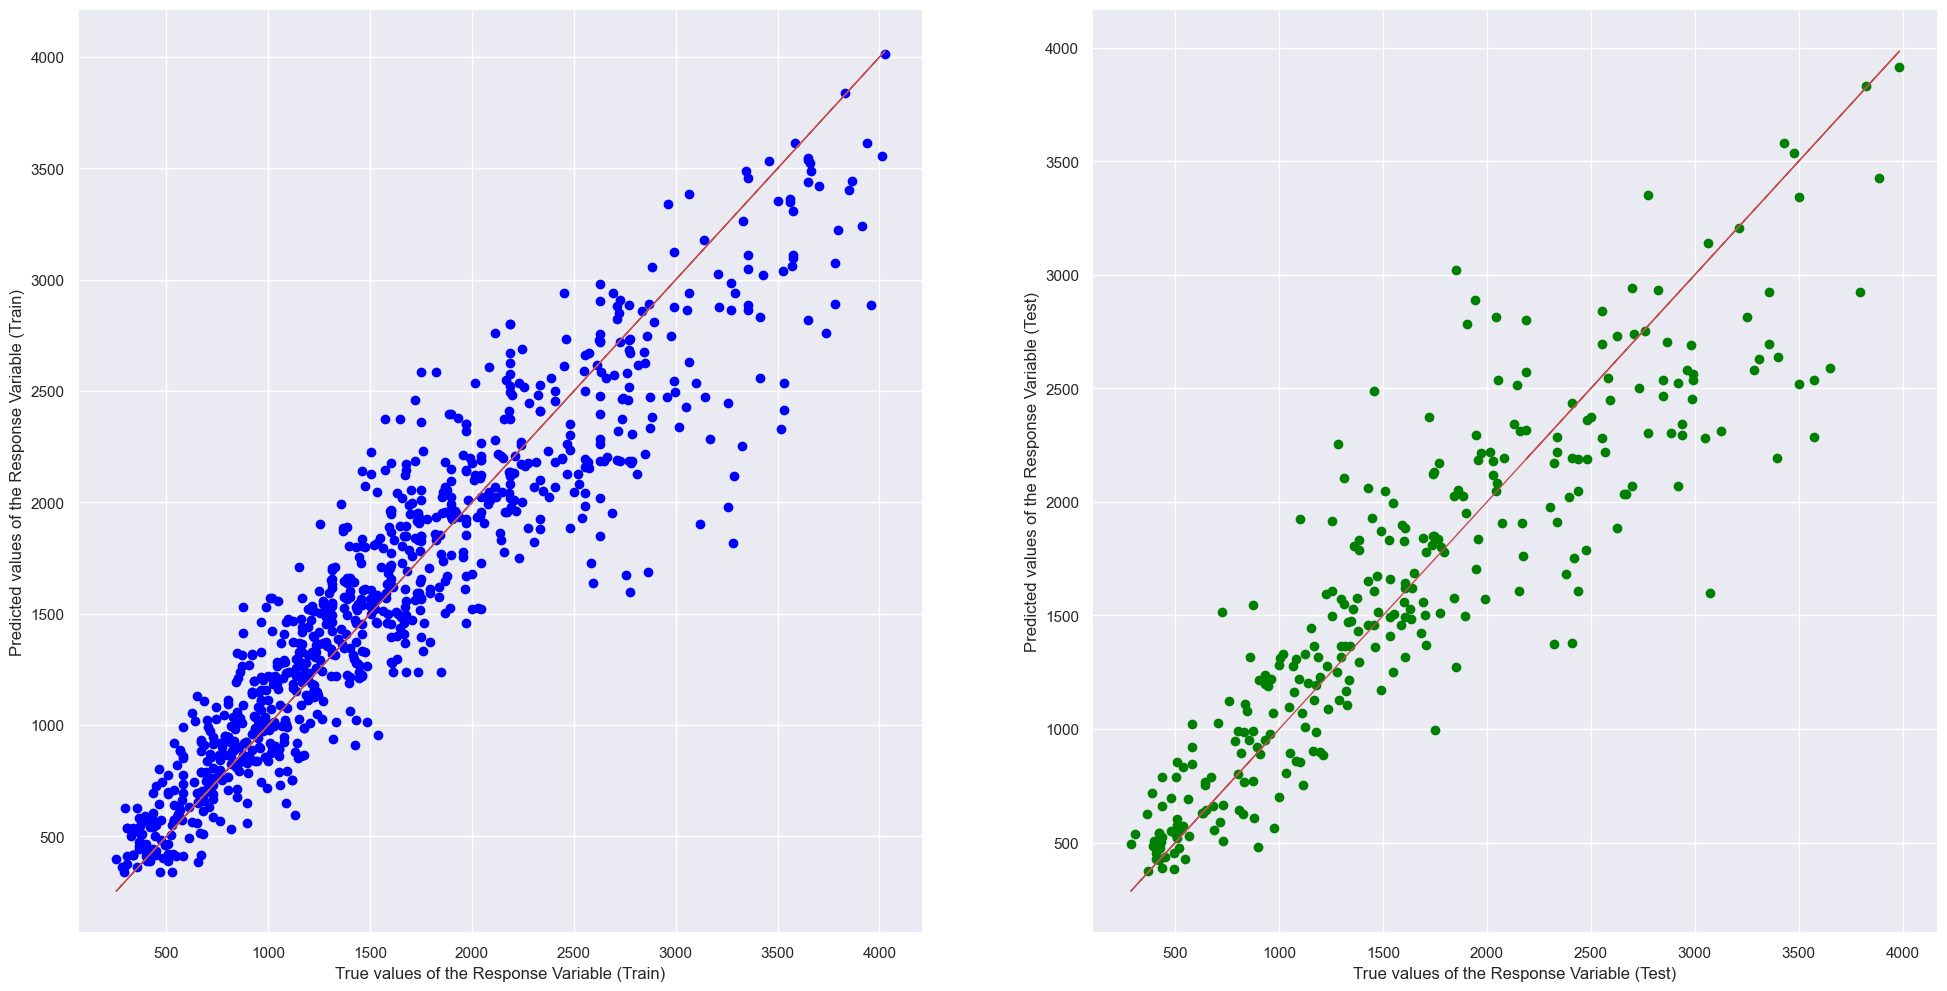

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8644329008584486
Mean Squared Error (MSE) 	: 95731.18347040856
Root Mean Squared Error (RMSE) 	: 309.4045627821422

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8043662584351455
Mean Squared Error (MSE) 	: 150573.37672425146
Root Mean Squared Error (RMSE) 	: 388.0378547567897



In [67]:
# Plotting
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_new, y_train_pred_gbr_new, color="blue")
axes[0].plot(y_train_new, y_train_new, 'r-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_new, y_test_pred_gbr_new, color="green")
axes[1].plot(y_test_new, y_test_new, 'r-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train_new, y_train_new))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_new, y_train_pred_gbr_new))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train_new, y_train_pred_gbr_new)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test_new, y_test_new))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_new, y_test_pred_gbr_new))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test_new, y_test_pred_gbr_new)))
print()

In [68]:
# Assuming user_input is defined as per your previous code
user_input_df = pd.DataFrame([user_input])  # Convert the dictionary to a DataFrame
predicted_price_gbr_new = gbr.predict(user_input_df)  # Predict price using Gradient Boosting

# Calculate the error between actual and predicted price
actual_price = selected_laptop["Price_SGD"]  # Assuming the actual price is known and as provided before
percentage_error_gbr_new = 100 * abs(actual_price - predicted_price_gbr_new[0]) / actual_price

print("Predicted Price (SGD) using Gradient Boosting:", predicted_price_gbr_new[0])
print("Actual Price (SGD):", actual_price)
print("Percentage Error using Gradient Boosting:", percentage_error_gbr_new)

Predicted Price (SGD) using Gradient Boosting: 1837.3216505729838
Actual Price (SGD): 1955.95
Percentage Error using Gradient Boosting: 6.064999075999706


In [69]:
#Determining the confidence of Predictions 
MSE_train_gbr_new = mean_squared_error(y_train_new, y_train_pred_gbr_new)
StdE_pred_gbr_new = np.sqrt(len(y_train_new) * MSE_train_gbr_new/(len(y_train_new) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train_gbr_new.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred_gbr_new.round(2))

# Confidence Intervals
y_95l_gbr_new = predicted_price_gbr_new[0] - 1.96 * StdE_pred_gbr_new
y_95u_gbr_new = predicted_price_gbr_new[0] + 1.96 * StdE_pred_gbr_new
y_99l_gbr_new = predicted_price_gbr_new[0] - 2.58 * StdE_pred_gbr_new
y_99u_gbr_new = predicted_price_gbr_new[0] + 2.58 * StdE_pred_gbr_new

gradient_boosting_regression_data = {
    "Actual Price": [actual_price],
    "Predicted Price": [predicted_price_gbr_new[0]],
    "% Error": [percentage_error_gbr_new],
    "95 Lower": [y_95l_gbr_new],
    "95 Upper": [y_95u_gbr_new],
    "99 Lower": [y_99l_gbr_new],
    "99 Upper": [y_99u_gbr_new],
    "MSE": mean_squared_error(y_test_new, y_test_pred_gbr_new),
    "R^2": gbr.score(X_test_new, y_test_new),
    "RMSE": np.sqrt(mean_squared_error(y_test_new, y_test_pred_gbr_new)),
}

gradient_boosting_regression_new_df = pd.DataFrame(gradient_boosting_regression_data)
gradient_boosting_regression_new_df 

Mean Squared Error (MSE) 	: 95731.18
Pred Standard Error (SE) 	: 309.75


Actual Price  Predicted Price   % Error     95 Lower     95 Upper  \
0       1955.95      1837.321651  6.064999  1230.203085  2444.440216   

      99 Lower     99 Upper            MSE       R^2        RMSE  
0  1038.155375  2636.487926  150573.376724  0.804366  388.037855

In [70]:
Comparison_Of_Models = pd.concat([gradient_boosting_regression_df, gradient_boosting_regression_new_df], 
                                  keys=['Gradient Boosting Regression', 'Gradient Boosting Regression after Removing Outliers' ])

Comparison_Of_Models

Actual Price  \
Gradient Boosting Regression                       0       1955.95   
Gradient Boosting Regression after Removing Out... 0       1955.95   

                                                      Predicted Price  \
Gradient Boosting Regression                       0      1948.636959   
Gradient Boosting Regression after Removing Out... 0      1837.321651   

                                                       % Error     95 Lower  \
Gradient Boosting Regression                       0  0.373887  1299.156786   
Gradient Boosting Regression after Removing Out... 0  6.064999  1230.203085   

                                                         95 Upper  \
Gradient Boosting Regression                       0  2598.117132   
Gradient Boosting Regression after Removing Out... 0  2444.440216   

                                                         99 Lower  \
Gradient Boosting Regression                       0  1093.708977   
Gradient Boosting Regression after Removing Out... 0  1038.155375   

                                                         99 Upper  \
Gradient Boosting Regression                       0  2803.564941   
Gradient Boosting Regression after Removing Out... 0  2636.487926   

                                                                MSE       R^2  \
Gradient Boosting Regression                       0  339663.080291  0.757649   
Gradient Boosting Regression after Removing Out... 0  150573.376724  0.804366   

                                                            RMSE  
Gradient Boosting Regression                       0  582.806212  
Gradient Boosting Regression after Removing Out... 0  388.037855

## Evaluation of Removing Outliers on Gradient Boosting Regression 

To see whether the removal of outliers has improved the accuracy of the Gradient Boosting Regression model, we will look at the MSE, R^2 and RSME values. Having a lower MSE and RSME indicates predictions made by model is closer to the actual values of model on average. A higher R^2 value explains more of the variance in the target variable, indicating greater accuracy,.

From table, MSE and RMSE values are now lower, and R^2 value is closer to 1, hence accuracy of model has improved after removing outliers. Hence, removing outliers increases the accuracy of model.

## Overall Conclusion

From our exploratory analysis, the categorical variables Gpu and presence of Touchscreen as well as the numerical variable Ram has the greatest correlation to Price. Hence, in our analysis, we will consider Gpu, presence of Touchscreen and Ram the most. 

To predict the prices of laptops, we have used Linear regression, Lasso regression, Gradient Boosting Regression, Random Forest. From our findings, the Gradient Boosting Regression Model has the lowest MSE, highest R^2 value and lowest RSME, making it the best model in the prediction of Price. 